# Results of UNET Data Set 10.0015 Super-Resolution Experiments

Importing packages:

In [3]:
from PIL import Image, ImageStat
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from scipy.ndimage.filters import gaussian_filter
from sklearn.cluster import MeanShift, KMeans, estimate_bandwidth
from skimage.metrics import mean_squared_error
import matplotlib.pyplot as plt
import glob 
import random
import numpy as np
import os
import re
import cv2
import argparse
import pandas as pd
import math
import torch  
import torch.nn.functional as F 

## SRCNN

Create the data sets with results:

In [4]:
# validation set for all 5 n-folds

# PSNR
val_results_psnr_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/val_results_psnr_0.csv')
val_results_psnr_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/val_results_psnr_1.csv')
val_results_psnr_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/val_results_psnr_2.csv')
val_results_psnr_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/val_results_psnr_3.csv')
val_results_psnr_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/val_results_psnr_4.csv')

# SSIM
val_results_ssim_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/val_results_ssim_0.csv')
val_results_ssim_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/val_results_ssim_1.csv')
val_results_ssim_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/val_results_ssim_2.csv')
val_results_ssim_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/val_results_ssim_3.csv')
val_results_ssim_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/val_results_ssim_4.csv')

# SSSIM
val_results_sssim_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/val_results_sssim_0.csv')
val_results_sssim_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/val_results_sssim_1.csv')
val_results_sssim_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/val_results_sssim_2.csv')
val_results_sssim_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/val_results_sssim_3.csv')
val_results_sssim_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/val_results_sssim_4.csv')


In [5]:
# crop the data frames
val_results_psnr_0 = val_results_psnr_0.iloc[:100,1:11]
val_results_psnr_1 = val_results_psnr_1.iloc[:100,1:11]
val_results_psnr_2 = val_results_psnr_2.iloc[:100,1:11]
val_results_psnr_3 = val_results_psnr_3.iloc[:100,1:11]
val_results_psnr_4 = val_results_psnr_4.iloc[:100,1:11]

val_results_ssim_0 = val_results_ssim_0.iloc[:100,1:11]
val_results_ssim_1 = val_results_ssim_1.iloc[:100,1:11]
val_results_ssim_2 = val_results_ssim_2.iloc[:100,1:11]
val_results_ssim_3 = val_results_ssim_3.iloc[:100,1:11]
val_results_ssim_4 = val_results_ssim_4.iloc[:100,1:11]

val_results_sssim_0 = val_results_sssim_0.iloc[:100,1:11]
val_results_sssim_1 = val_results_sssim_1.iloc[:100,1:11]
val_results_sssim_2 = val_results_sssim_2.iloc[:100,1:11]
val_results_sssim_3 = val_results_sssim_3.iloc[:100,1:11]
val_results_sssim_4 = val_results_sssim_4.iloc[:100,1:11]

In [6]:
# test set for all folds

# PSNR
test_results_psnr_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/test_results_psnr_0.csv')
test_results_psnr_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/test_results_psnr_1.csv')
test_results_psnr_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/test_results_psnr_2.csv')
test_results_psnr_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/test_results_psnr_3.csv')
test_results_psnr_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/test_results_psnr_4.csv')

# SSIM
test_results_ssim_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/test_results_ssim_0.csv')
test_results_ssim_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/test_results_ssim_1.csv')
test_results_ssim_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/test_results_ssim_2.csv')
test_results_ssim_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/test_results_ssim_3.csv')
test_results_ssim_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/test_results_ssim_4.csv')

# SSSIM 
test_results_sssim_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/test_results_sssim_0.csv')
test_results_sssim_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/test_results_sssim_1.csv')
test_results_sssim_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/test_results_sssim_2.csv')
test_results_sssim_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/test_results_sssim_3.csv')
test_results_sssim_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/test_results_sssim_4.csv')

In [7]:
# crop the data frames
test_results_psnr_0 = test_results_psnr_0.iloc[:251,1:11]
test_results_psnr_1 = test_results_psnr_1.iloc[:251,1:11]
test_results_psnr_2 = test_results_psnr_2.iloc[:251,1:11]
test_results_psnr_3 = test_results_psnr_3.iloc[:251,1:11]
test_results_psnr_4 = test_results_psnr_4.iloc[:251,1:11]

test_results_ssim_0 = test_results_ssim_0.iloc[:251,1:11]
test_results_ssim_1 = test_results_ssim_1.iloc[:251,1:11]
test_results_ssim_2 = test_results_ssim_2.iloc[:251,1:11]
test_results_ssim_3 = test_results_ssim_3.iloc[:251,1:11]
test_results_ssim_4 = test_results_ssim_4.iloc[:251,1:11]

test_results_sssim_0 = test_results_sssim_0.iloc[:251,1:11]
test_results_sssim_1 = test_results_sssim_1.iloc[:251,1:11]
test_results_sssim_2 = test_results_sssim_2.iloc[:251,1:11]
test_results_sssim_3 = test_results_sssim_3.iloc[:251,1:11]
test_results_sssim_4 = test_results_sssim_4.iloc[:251,1:11]

In [8]:
# train set for all folds

# PSNR
train_results_psnr_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/train_results_psnr_0.csv')
train_results_psnr_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/train_results_psnr_1.csv')
train_results_psnr_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/train_results_psnr_2.csv')
train_results_psnr_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/train_results_psnr_3.csv')
train_results_psnr_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/train_results_psnr_4.csv')

# SSIM
train_results_ssim_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/train_results_ssim_0.csv')
train_results_ssim_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/train_results_ssim_1.csv')
train_results_ssim_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/train_results_ssim_2.csv')
train_results_ssim_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/train_results_ssim_3.csv')
train_results_ssim_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/train_results_ssim_4.csv')

# SSSIM
train_results_sssim_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/train_results_sssim_0.csv')
train_results_sssim_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/train_results_sssim_1.csv')
train_results_sssim_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/train_results_sssim_2.csv')
train_results_sssim_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/train_results_sssim_3.csv')
train_results_sssim_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10_0015/train_results_sssim_4.csv')

In [9]:
# crop the data frames
train_results_psnr_0 = train_results_psnr_0.iloc[:901,1:11]
train_results_psnr_1 = train_results_psnr_1.iloc[:901,1:11]
train_results_psnr_2 = train_results_psnr_2.iloc[:901,1:11]
train_results_psnr_3 = train_results_psnr_3.iloc[:901,1:11]
train_results_psnr_4 = train_results_psnr_4.iloc[:901,1:11]

train_results_ssim_0 = train_results_ssim_0.iloc[:901,1:11]
train_results_ssim_1 = train_results_ssim_1.iloc[:901,1:11]
train_results_ssim_2 = train_results_ssim_2.iloc[:901,1:11]
train_results_ssim_3 = train_results_ssim_3.iloc[:901,1:11]
train_results_ssim_4 = train_results_ssim_4.iloc[:901,1:11]

train_results_sssim_0 = train_results_sssim_0.iloc[:901,1:11]
train_results_sssim_1 = train_results_sssim_1.iloc[:901,1:11]
train_results_sssim_2 = train_results_sssim_2.iloc[:901,1:11]
train_results_sssim_3 = train_results_sssim_3.iloc[:901,1:11]
train_results_sssim_4 = train_results_sssim_4.iloc[:901,1:11]

## Visualize Validation data sets

### SSIM / SSSIM Scores for all n-folds separately

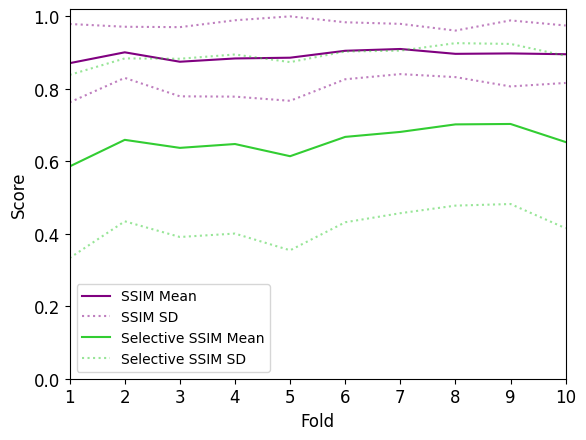

In [8]:
ssim_means = val_results_ssim_0.mean()
ssim_stds = val_results_ssim_0.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_0.mean()
sssim_stds = val_results_sssim_0.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10_0015/ssim_val_0.png")

In [9]:
print(ssim_means,ssim_stds)

0    0.870863
1    0.900800
2    0.874795
3    0.883857
4    0.885933
5    0.905060
6    0.909988
7    0.896590
8    0.897739
9    0.895514
dtype: float64 0    0.108091
1    0.070539
2    0.095450
3    0.105350
4    0.118972
5    0.078639
6    0.069331
7    0.064216
8    0.091090
9    0.079258
dtype: float64


In [10]:
print(sssim_means,sssim_stds)

0    0.585851
1    0.659230
2    0.637090
3    0.647713
4    0.614089
5    0.667383
6    0.681125
7    0.701893
8    0.703047
9    0.653157
dtype: float64 0    0.252691
1    0.224769
2    0.245943
3    0.247135
4    0.259661
5    0.235629
6    0.224310
7    0.224196
8    0.220918
9    0.237926
dtype: float64


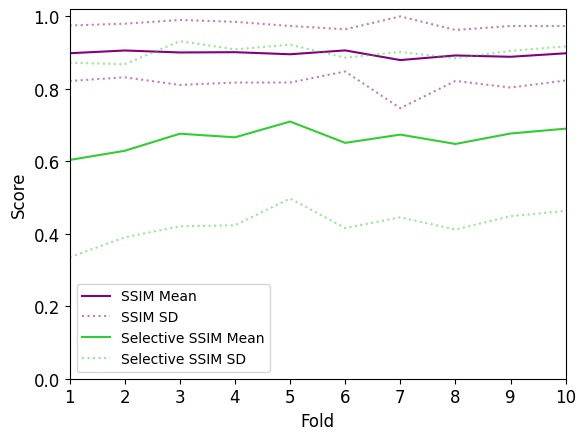

In [12]:
ssim_means = val_results_ssim_1.mean()
ssim_stds = val_results_ssim_1.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_1.mean()
sssim_stds = val_results_sssim_1.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10_0015/ssim_val_1.png")

In [13]:
print(ssim_means,ssim_stds)

0    0.898233
1    0.905845
2    0.900368
3    0.901155
4    0.895431
5    0.906062
6    0.879393
7    0.892133
8    0.888476
9    0.898106
dtype: float64 0    0.076552
1    0.073950
2    0.089635
3    0.083806
4    0.078074
5    0.058177
6    0.132811
7    0.070312
8    0.084920
9    0.075067
dtype: float64


In [14]:
print(sssim_means,ssim_stds)

0    0.603684
1    0.629055
2    0.676168
3    0.666204
4    0.709700
5    0.650925
6    0.673649
7    0.647903
8    0.676703
9    0.690135
dtype: float64 0    0.076552
1    0.073950
2    0.089635
3    0.083806
4    0.078074
5    0.058177
6    0.132811
7    0.070312
8    0.084920
9    0.075067
dtype: float64


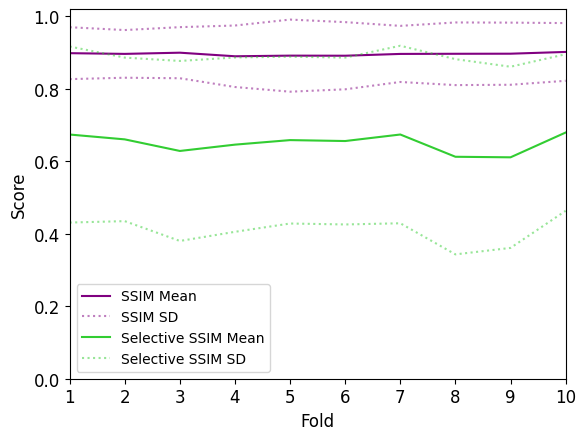

In [15]:
ssim_means = val_results_ssim_2.mean()
ssim_stds = val_results_ssim_2.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_2.mean()
sssim_stds = val_results_sssim_2.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10_0015/ssim_val_2.png")

In [16]:
print(ssim_means,ssim_stds)

0    0.898421
1    0.896453
2    0.899757
3    0.889891
4    0.891631
5    0.891396
6    0.896366
7    0.896759
8    0.896983
9    0.901843
dtype: float64 0    0.071616
1    0.065779
2    0.070505
3    0.084848
4    0.099500
5    0.092687
6    0.077422
7    0.086440
8    0.085733
9    0.079630
dtype: float64


In [17]:
print(sssim_means,sssim_stds )

0    0.673903
1    0.660537
2    0.628577
3    0.646010
4    0.658529
5    0.655970
6    0.673960
7    0.612544
8    0.611019
9    0.679459
dtype: float64 0    0.242900
1    0.225640
2    0.248408
3    0.240565
4    0.230205
5    0.230235
6    0.244961
7    0.269386
8    0.250005
9    0.216053
dtype: float64


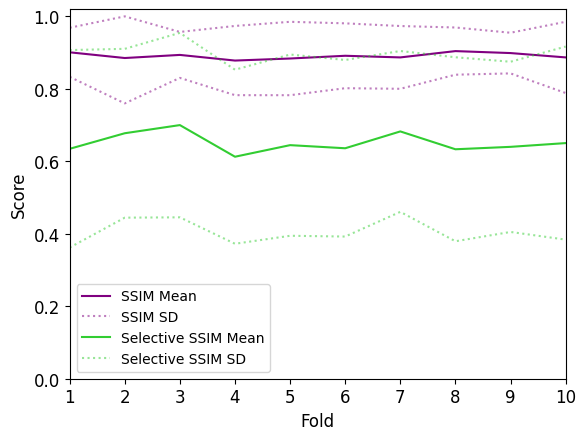

In [18]:
ssim_means = val_results_ssim_3.mean()
ssim_stds = val_results_ssim_3.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_3.mean()
sssim_stds = val_results_sssim_3.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10_0015/ssim_val_3.png")

In [19]:
print(ssim_means, ssim_stds)

0    0.900834
1    0.885055
2    0.893625
3    0.878051
4    0.883709
5    0.891258
6    0.886733
7    0.904150
8    0.898727
9    0.886755
dtype: float64 0    0.067735
1    0.125207
2    0.063391
3    0.095513
4    0.101281
5    0.089497
6    0.086605
7    0.065141
8    0.056085
9    0.098268
dtype: float64


In [20]:
print(sssim_means, sssim_stds )

0    0.634481
1    0.677460
2    0.699951
3    0.612642
4    0.644608
5    0.636027
6    0.682469
7    0.633234
8    0.639914
9    0.650275
dtype: float64 0    0.272486
1    0.232975
2    0.254548
3    0.240184
4    0.250122
5    0.243640
6    0.221950
7    0.253900
8    0.234879
9    0.266393
dtype: float64


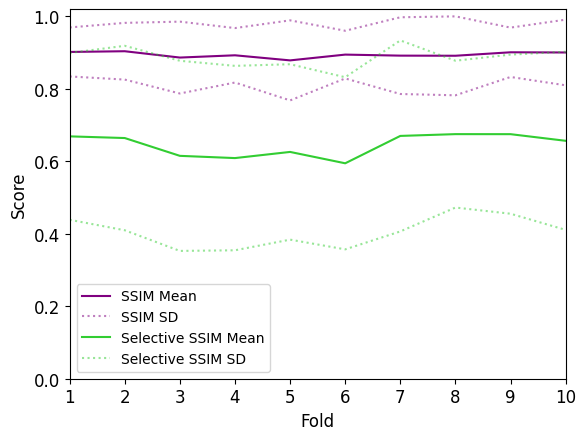

In [21]:
ssim_means = val_results_ssim_4.mean()
ssim_stds = val_results_ssim_4.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_4.mean()
sssim_stds = val_results_sssim_4.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10_0015/ssim_val_4.png")

In [22]:
print(ssim_means, ssim_stds)

0    0.901811
1    0.903786
2    0.886326
3    0.892574
4    0.878522
5    0.894478
6    0.891641
7    0.891332
8    0.900878
9    0.900339
dtype: float64 0    0.067630
1    0.078263
2    0.099149
3    0.075138
4    0.110476
5    0.065823
6    0.105873
7    0.109158
8    0.068104
9    0.090596
dtype: float64


In [23]:
print(sssim_means,sssim_stds )

0    0.668851
1    0.664222
2    0.615083
3    0.608916
4    0.625884
5    0.594531
6    0.670085
7    0.675003
8    0.674900
9    0.656595
dtype: float64 0    0.230217
1    0.254533
2    0.262382
3    0.254470
4    0.242063
5    0.237516
6    0.263582
7    0.202591
8    0.219542
9    0.245829
dtype: float64


### PSNR results for all n-folds separately

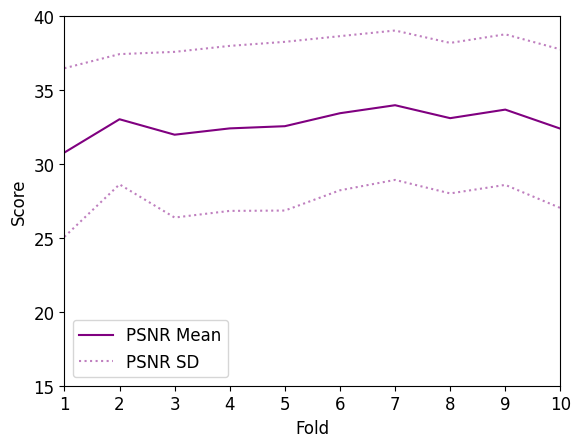

In [24]:
psnr_means = val_results_psnr_0.mean()
psnr_stds = val_results_psnr_0.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=40)
plt.savefig("unet_results_10_0015/psnr_val_0.png")

In [25]:
print(psnr_means, psnr_stds)

0    30.772851
1    33.024608
2    31.979103
3    32.405987
4    32.554846
5    33.431793
6    33.973681
7    33.097565
8    33.676850
9    32.387065
dtype: float64 0    5.703402
1    4.404818
2    5.604018
3    5.580568
4    5.706246
5    5.213132
6    5.052405
7    5.090114
8    5.092778
9    5.365798
dtype: float64


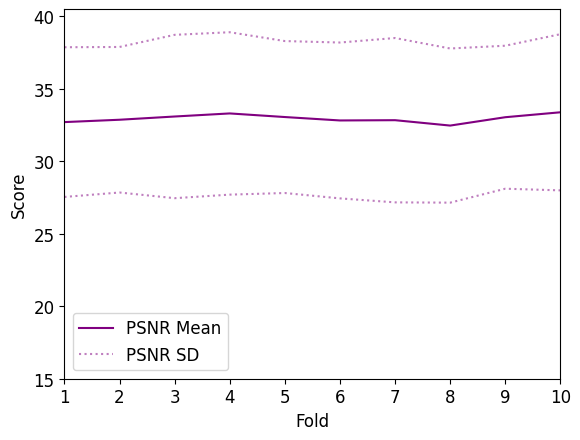

In [26]:
psnr_means = val_results_psnr_1.mean()
psnr_stds = val_results_psnr_1.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=40.5)
plt.savefig("unet_results_10_0015/psnr_val_1.png")

In [27]:
print(psnr_means, psnr_stds)

0    32.705829
1    32.867836
2    33.091148
3    33.303154
4    33.054304
5    32.818642
6    32.837169
7    32.465814
8    33.042382
9    33.382607
dtype: float64 0    5.164010
1    5.020601
2    5.634998
3    5.602087
4    5.241711
5    5.376638
6    5.669653
7    5.317863
8    4.932464
9    5.387833
dtype: float64


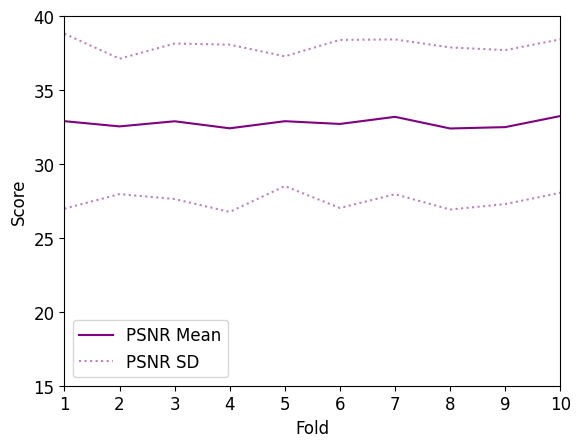

In [31]:
psnr_means = val_results_psnr_2.mean()
psnr_stds = val_results_psnr_2.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=40)
plt.savefig("unet_results_10_0015/psnr_val_2.png")

In [29]:
print(psnr_means, psnr_stds)

0    32.893893
1    32.540494
2    32.887362
3    32.412327
4    32.892486
5    32.706860
6    33.187711
7    32.399820
8    32.492477
9    33.242283
dtype: float64 0    5.915839
1    4.579771
2    5.259366
3    5.657904
4    4.387939
5    5.685221
6    5.235006
7    5.481730
8    5.207359
9    5.187052
dtype: float64


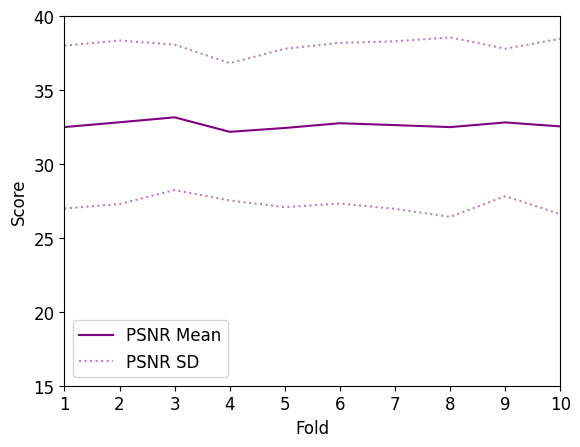

In [32]:
psnr_means = val_results_psnr_3.mean()
psnr_stds = val_results_psnr_3.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=40)
plt.savefig("unet_results_10_0015/psnr_val_3.png")

In [33]:
print(psnr_means, psnr_stds)

0    32.495701
1    32.819588
2    33.153730
3    32.174162
4    32.435023
5    32.755631
6    32.628582
7    32.492546
8    32.809470
9    32.538661
dtype: float64 0    5.508277
1    5.531029
2    4.915547
3    4.645167
4    5.354083
5    5.436408
6    5.666648
7    6.071558
8    4.988150
9    5.932571
dtype: float64


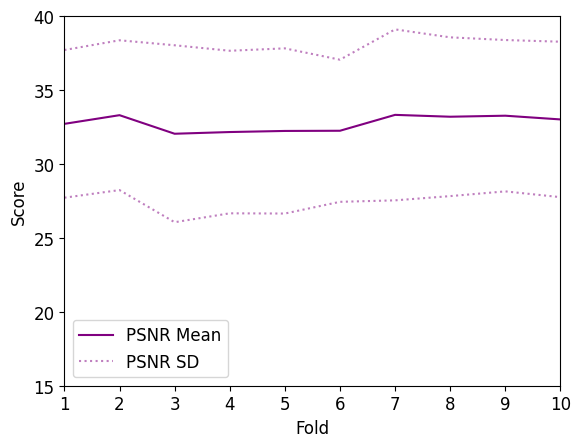

In [34]:
psnr_means = val_results_psnr_4.mean()
psnr_stds = val_results_psnr_4.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=40)
plt.savefig("unet_results_10_0015/psnr_val_4.png")

In [35]:
print(psnr_means, psnr_stds)

0    32.713272
1    33.299480
2    32.043824
3    32.159421
4    32.233130
5    32.246090
6    33.320837
7    33.195113
8    33.264044
9    33.012566
dtype: float64 0    4.994626
1    5.066180
2    5.984397
3    5.497477
4    5.586450
5    4.807287
6    5.782114
7    5.369628
8    5.118685
9    5.257208
dtype: float64


## Visualize Test Set

### SSIM / SSSIM Comparison for each n-fold

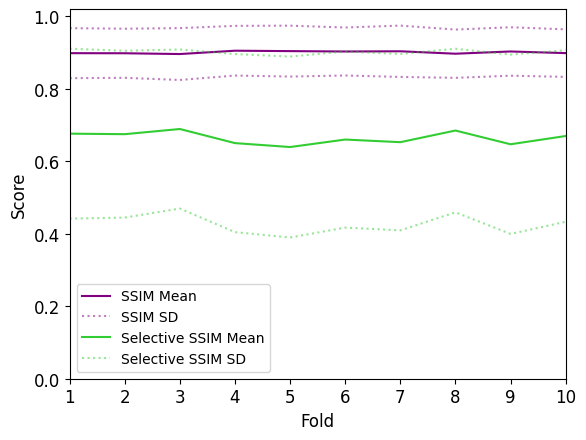

In [52]:
ssim_means = test_results_ssim_0.mean()
ssim_stds = test_results_ssim_0.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_0.mean()
sssim_stds = test_results_sssim_0.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10_0015/ssim_test_0.png")

In [37]:
print(ssim_means, ssim_stds)

0    0.898440
1    0.898189
2    0.896033
3    0.905239
4    0.904113
5    0.903075
6    0.903671
7    0.896948
8    0.903113
9    0.898573
dtype: float64 0    0.069024
1    0.067768
2    0.071544
3    0.068544
4    0.070251
5    0.066184
6    0.070840
7    0.066585
8    0.066837
9    0.065615
dtype: float64


In [38]:
print(sssim_means,sssim_stds)

0    0.676310
1    0.674866
2    0.689150
3    0.650229
4    0.639398
5    0.660067
6    0.652813
7    0.684939
8    0.647036
9    0.669808
dtype: float64 0    0.234460
1    0.230183
2    0.219506
3    0.245691
4    0.249690
5    0.243029
6    0.243385
7    0.225672
8    0.247398
9    0.236756
dtype: float64


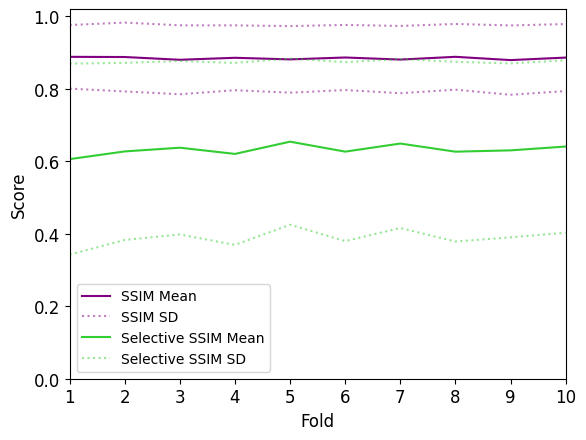

In [39]:
ssim_means = test_results_ssim_1.mean()
ssim_stds = test_results_ssim_1.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_1.mean()
sssim_stds = test_results_sssim_1.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10_0015/ssim_test_1.png")

In [40]:
print(ssim_means, ssim_stds)

0    0.888325
1    0.887815
2    0.880212
3    0.885687
4    0.881279
5    0.886500
6    0.880783
7    0.888361
8    0.879340
9    0.886252
dtype: float64 0    0.087728
1    0.094990
2    0.095117
3    0.089440
4    0.091860
5    0.089880
6    0.092775
7    0.090677
8    0.095689
9    0.092450
dtype: float64


In [41]:
print(sssim_means,sssim_stds)

0    0.606053
1    0.627314
2    0.637540
3    0.620425
4    0.654235
5    0.626739
6    0.649022
7    0.626586
8    0.630211
9    0.640783
dtype: float64 0    0.263522
1    0.244370
2    0.239299
3    0.251066
4    0.229304
5    0.246941
6    0.233051
7    0.247937
8    0.239962
9    0.237946
dtype: float64


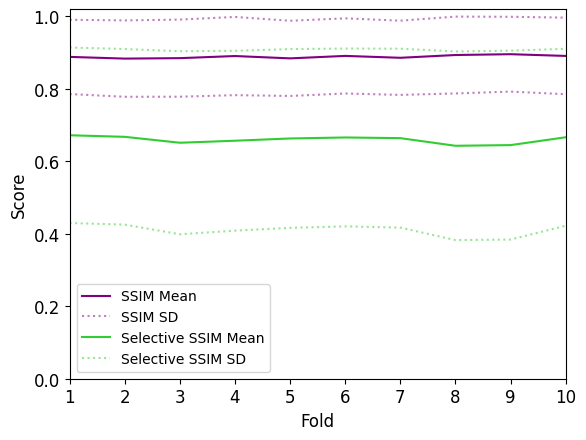

In [42]:
ssim_means = test_results_ssim_2.mean()
ssim_stds = test_results_ssim_2.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_2.mean()
sssim_stds = test_results_sssim_2.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10_0015/ssim_test_2.png")

In [43]:
print(ssim_means, ssim_stds)

0    0.888158
1    0.883454
2    0.884695
3    0.890525
4    0.884082
5    0.890887
6    0.885692
7    0.893328
8    0.895610
9    0.890820
dtype: float64 0    0.102484
1    0.105358
2    0.106420
3    0.107932
4    0.103714
5    0.103705
6    0.102403
7    0.106016
8    0.103247
9    0.105681
dtype: float64


In [44]:
print(sssim_means,sssim_stds)

0    0.671897
1    0.667554
2    0.651238
3    0.656803
4    0.663036
5    0.665781
6    0.663932
7    0.642846
8    0.644726
9    0.666311
dtype: float64 0    0.242193
1    0.242292
2    0.252565
3    0.248130
4    0.246664
5    0.245368
6    0.246861
7    0.260290
8    0.260624
9    0.244161
dtype: float64


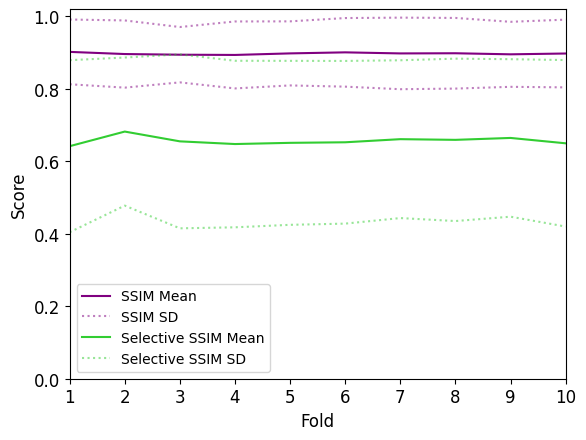

In [45]:
ssim_means = test_results_ssim_3.mean()
ssim_stds = test_results_ssim_3.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_3.mean()
sssim_stds = test_results_sssim_3.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10_0015/ssim_test_3.png")

In [46]:
print(ssim_means, ssim_stds)

0    0.901986
1    0.896050
2    0.894201
3    0.893545
4    0.897832
5    0.900693
6    0.897751
7    0.898199
8    0.895271
9    0.897511
dtype: float64 0    0.089344
1    0.092714
2    0.076368
3    0.092385
4    0.088418
5    0.094662
6    0.098761
7    0.097487
8    0.089716
9    0.093456
dtype: float64


In [47]:
print(sssim_means,sssim_stds)

0    0.641728
1    0.682071
2    0.655084
3    0.647652
4    0.650975
5    0.652516
6    0.661109
7    0.659227
8    0.664498
9    0.649682
dtype: float64 0    0.237402
1    0.204333
2    0.240035
3    0.229804
4    0.226269
5    0.224468
6    0.217734
7    0.224077
8    0.217335
9    0.229750
dtype: float64


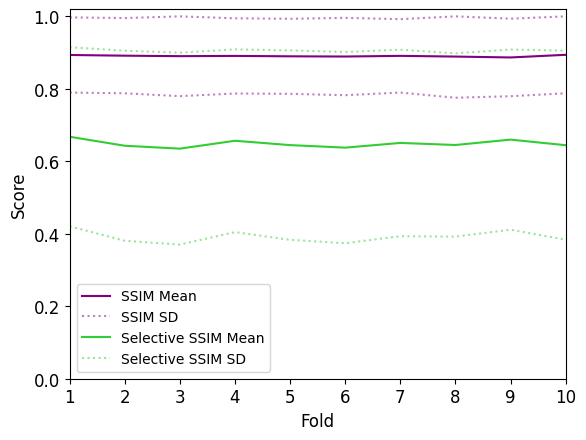

In [49]:
ssim_means = test_results_ssim_4.mean()
ssim_stds = test_results_ssim_4.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_4.mean()
sssim_stds = test_results_sssim_4.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10_0015/ssim_test_4.png")

In [50]:
print(ssim_means, ssim_stds)

0    0.893427
1    0.891503
2    0.890177
3    0.890886
4    0.889776
5    0.889167
6    0.891005
7    0.889048
8    0.886619
9    0.893895
dtype: float64 0    0.103763
1    0.103793
2    0.110362
3    0.103778
4    0.103523
5    0.106727
6    0.101276
7    0.113599
8    0.106968
9    0.106148
dtype: float64


In [51]:
print(sssim_means,sssim_stds)

0    0.667763
1    0.642953
2    0.634974
3    0.656714
4    0.644731
5    0.637732
6    0.650727
7    0.645027
8    0.659879
9    0.644471
dtype: float64 0    0.246993
1    0.262246
2    0.264776
3    0.252107
4    0.261354
5    0.263856
6    0.257349
7    0.252884
8    0.248634
9    0.260790
dtype: float64


### SSIM / SSSIM Comparison for all n-folds

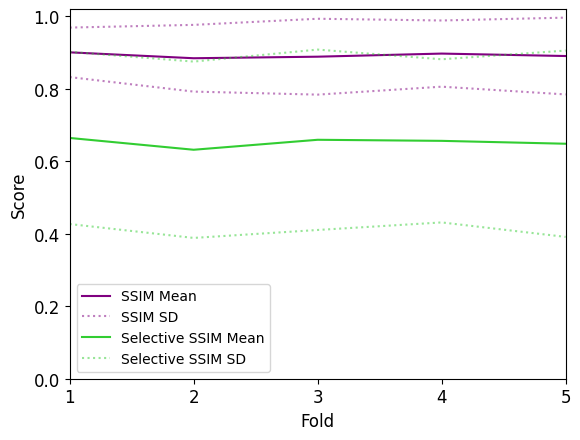

In [53]:
ssim_means_0 = test_results_ssim_0.mean()
ssim_stds_0 = test_results_ssim_0.std()
ssim_std_upper_0 = ssim_means_0 + ssim_stds_0
ssim_std_lower_0 = ssim_means_0 - ssim_stds_0
ssim_means_0 = ssim_means_0.mean()
ssim_stds_0 = ssim_stds_0.mean()
ssim_std_upper_0 = ssim_std_upper_0.mean()
ssim_std_lower_0 = ssim_std_lower_0.mean()

ssim_means_1 = test_results_ssim_1.mean()
ssim_stds_1 = test_results_ssim_1.std()
ssim_std_upper_1 = ssim_means_1 + ssim_stds_1
ssim_std_lower_1 = ssim_means_1 - ssim_stds_1
ssim_means_1 = ssim_means_1.mean()
ssim_stds_1 = ssim_stds_1.mean()
ssim_std_upper_1 = ssim_std_upper_1.mean()
ssim_std_lower_1 = ssim_std_lower_1.mean()

ssim_means_2 = test_results_ssim_2.mean()
ssim_stds_2 = test_results_ssim_2.std()
ssim_std_upper_2 = ssim_means_2 + ssim_stds_2
ssim_std_lower_2 = ssim_means_2 - ssim_stds_2
ssim_means_2 = ssim_means_2.mean()
ssim_stds_2 = ssim_stds_2.mean()
ssim_std_upper_2 = ssim_std_upper_2.mean()
ssim_std_lower_2 = ssim_std_lower_2.mean()

ssim_means_3 = test_results_ssim_3.mean()
ssim_stds_3 = test_results_ssim_3.std()
ssim_std_upper_3 = ssim_means_3 + ssim_stds_3
ssim_std_lower_3 = ssim_means_3 - ssim_stds_3
ssim_means_3 = ssim_means_3.mean()
ssim_stds_3 = ssim_stds_3.mean()
ssim_std_upper_3 = ssim_std_upper_3.mean()
ssim_std_lower_3 = ssim_std_lower_3.mean()

ssim_means_4 = test_results_ssim_4.mean()
ssim_stds_4 = test_results_ssim_4.std()
ssim_std_upper_4 = ssim_means_4 + ssim_stds_4
ssim_std_lower_4 = ssim_means_4 - ssim_stds_4
ssim_means_4 = ssim_means_4.mean()
ssim_stds_4 = ssim_stds_4.mean()
ssim_std_upper_4 = ssim_std_upper_4.mean()
ssim_std_lower_4 = ssim_std_lower_4.mean()

ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_stds_0, ssim_stds_1, ssim_stds_2, ssim_stds_3, ssim_stds_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

for i in range(len(ssim_std_upper)):
    if ssim_std_upper[i] > 1:
        ssim_std_upper[i] = 1

sssim_means_0 = test_results_sssim_0.mean()
sssim_stds_0 = test_results_sssim_0.std()
sssim_std_upper_0 = sssim_means_0 + sssim_stds_0
sssim_std_lower_0 = sssim_means_0 - sssim_stds_0
sssim_means_0 = sssim_means_0.mean()
sssim_stds_0 = sssim_stds_0.mean()
sssim_std_upper_0 = sssim_std_upper_0.mean()
sssim_std_lower_0 = sssim_std_lower_0.mean()

sssim_means_1 = test_results_sssim_1.mean()
sssim_stds_1 = test_results_sssim_1.std()
sssim_std_upper_1 = sssim_means_1 + sssim_stds_1
sssim_std_lower_1 = sssim_means_1 - sssim_stds_1
sssim_means_1 = sssim_means_1.mean()
sssim_stds_1 = sssim_stds_1.mean()
sssim_std_upper_1 = sssim_std_upper_1.mean()
sssim_std_lower_1 = sssim_std_lower_1.mean()

sssim_means_2 = test_results_sssim_2.mean()
sssim_stds_2 = test_results_sssim_2.std()
sssim_std_upper_2 = sssim_means_2 + sssim_stds_2
sssim_std_lower_2 = sssim_means_2 - sssim_stds_2
sssim_means_2 = sssim_means_2.mean()
sssim_stds_2 = sssim_stds_2.mean()
sssim_std_upper_2 = sssim_std_upper_2.mean()
sssim_std_lower_2 = sssim_std_lower_2.mean()

sssim_means_3 = test_results_sssim_3.mean()
sssim_stds_3 = test_results_sssim_3.std()
sssim_std_upper_3 = sssim_means_3 + sssim_stds_3
sssim_std_lower_3 = sssim_means_3 - sssim_stds_3
sssim_means_3 = sssim_means_3.mean()
sssim_stds_3 = sssim_stds_3.mean()
sssim_std_upper_3 = sssim_std_upper_3.mean()
sssim_std_lower_3 = sssim_std_lower_3.mean()

sssim_means_4 = test_results_sssim_4.mean()
sssim_stds_4 = test_results_sssim_4.std()
sssim_std_upper_4 = sssim_means_4 + sssim_stds_4
sssim_std_lower_4 = sssim_means_4 - sssim_stds_4
sssim_means_4 = sssim_means_4.mean()
sssim_stds_4 = sssim_stds_4.mean()
sssim_std_upper_4 = sssim_std_upper_4.mean()
sssim_std_lower_4 = sssim_std_lower_4.mean()

sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_stds_0, sssim_stds_1, sssim_stds_2, sssim_stds_3, sssim_stds_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

for i in range(len(sssim_std_upper)):
    if sssim_std_upper[i] > 1:
        sssim_std_upper[i] = 1



n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)


plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10_0015/ssim_test_mean_all_folds.png")

In [54]:
print(ssim_means, ssim_stds)

[0.9007393381272655, 0.8844555513851671, 0.8887250556295136, 0.8973037867669567, 0.8905503503473631] [0.06831926853164252, 0.09206060904384998, 0.10469611806086576, 0.09133109374378805, 0.10599367509640503]


In [55]:
print(sssim_means, sssim_stds)

[0.6644615214481296, 0.6318908211645259, 0.6594124551684377, 0.6564542147238178, 0.6484971364833919] [0.23757706099004325, 0.2433396267075766, 0.248914983102204, 0.225120669655616, 0.25709896405554694]


### SSSIM/SSIM Comparison over all n-folds


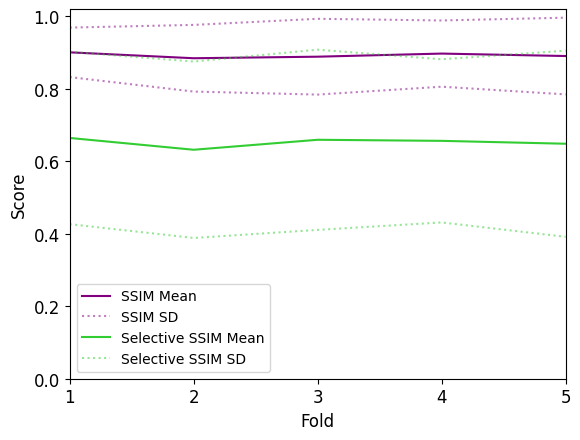

In [10]:
fold_0_test_ssim = np.array(test_results_ssim_0).reshape(-1,1)
fold_1_test_ssim = np.array(test_results_ssim_1).reshape(-1,1)
fold_2_test_ssim = np.array(test_results_ssim_2).reshape(-1,1)
fold_3_test_ssim = np.array(test_results_ssim_3).reshape(-1,1)
fold_4_test_ssim = np.array(test_results_ssim_4).reshape(-1,1)

ssim_means_0 = np.mean(fold_0_test_ssim)
ssim_std_0 = np.std(fold_0_test_ssim)
ssim_std_upper_0 = ssim_means_0 + ssim_std_0
ssim_std_lower_0 = ssim_means_0 - ssim_std_0
if ssim_std_upper_0 > 1:
    ssim_std_upper_0 = 1

ssim_means_1 = np.mean(fold_1_test_ssim)
ssim_std_1 = np.std(fold_1_test_ssim)
ssim_std_upper_1 = ssim_means_1 + ssim_std_1
ssim_std_lower_1 = ssim_means_1 - ssim_std_1
if ssim_std_upper_1 > 1:
    ssim_std_upper_1 = 1

ssim_means_2 = np.mean(fold_2_test_ssim)
ssim_std_2 = np.std(fold_2_test_ssim)
ssim_std_upper_2 = ssim_means_2 + ssim_std_2
ssim_std_lower_2 = ssim_means_2 - ssim_std_2
if ssim_std_upper_2 > 1:
    ssim_std_upper_2 = 1

ssim_means_3 = np.mean(fold_3_test_ssim)
ssim_std_3 = np.std(fold_3_test_ssim)
ssim_std_upper_3 = ssim_means_3 + ssim_std_3
ssim_std_lower_3 = ssim_means_3 - ssim_std_3
if ssim_std_upper_3 > 1:
    ssim_std_upper_3 = 1

ssim_means_4 = np.mean(fold_4_test_ssim)
ssim_std_4 = np.std(fold_4_test_ssim)
ssim_std_upper_4 = ssim_means_4 + ssim_std_4
ssim_std_lower_4 = ssim_means_4 - ssim_std_4
if ssim_std_upper_4 > 1:
    ssim_std_upper_4 = 1
    
ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_std_0, ssim_std_1, ssim_std_2, ssim_std_3, ssim_std_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

fold_0_test_sssim = np.array(test_results_sssim_0).reshape(-1,1)
fold_1_test_sssim = np.array(test_results_sssim_1).reshape(-1,1)
fold_2_test_sssim = np.array(test_results_sssim_2).reshape(-1,1)
fold_3_test_sssim = np.array(test_results_sssim_3).reshape(-1,1)
fold_4_test_sssim = np.array(test_results_sssim_4).reshape(-1,1)

sssim_means_0 = np.mean(fold_0_test_sssim)
sssim_std_0 = np.std(fold_0_test_sssim)
sssim_std_upper_0 = sssim_means_0 + sssim_std_0
sssim_std_lower_0 = sssim_means_0 - sssim_std_0
if sssim_std_upper_0 > 1:
    sssim_std_upper_0 = 1

sssim_means_1 = np.mean(fold_1_test_sssim)
sssim_std_1 = np.std(fold_1_test_sssim)
sssim_std_upper_1 = sssim_means_1 + sssim_std_1
sssim_std_lower_1 = sssim_means_1 - sssim_std_1
if sssim_std_upper_1 > 1:
    sssim_std_upper_1 = 1

sssim_means_2 = np.mean(fold_2_test_sssim)
sssim_std_2 = np.std(fold_2_test_sssim)
sssim_std_upper_2 = sssim_means_2 + sssim_std_2
sssim_std_lower_2 = sssim_means_2 - sssim_std_2
if sssim_std_upper_2 > 1:
    sssim_std_upper_2 = 1

sssim_means_3 = np.mean(fold_3_test_sssim)
sssim_std_3 = np.std(fold_3_test_sssim)
sssim_std_upper_3 = sssim_means_3 + sssim_std_3
sssim_std_lower_3 = sssim_means_3 - sssim_std_3
if sssim_std_upper_3 > 1:
    sssim_std_upper_3 = 1

sssim_means_4 = np.mean(fold_4_test_sssim)
sssim_std_4 = np.std(fold_4_test_sssim)
sssim_std_upper_4 = sssim_means_4 + sssim_std_4
sssim_std_lower_4 = sssim_means_4 - sssim_std_4
if sssim_std_upper_4 > 1:
    sssim_std_upper_4 = 1
    
    
sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_std_0, sssim_std_1, sssim_std_2, sssim_std_3, sssim_std_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)


plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10_0015/ssim_test_mean_std_all_folds.png")

In [11]:
print(ssim_means, ssim_stds)

[0.9007393381272654, 0.8844555513851671, 0.8887250556295136, 0.8973037867669565, 0.8905503503473632] [0.06828750562919907, 0.09197605446469632, 0.1045766298441248, 0.09137550102212248, 0.1058589118797141]


In [12]:
print(sssim_means, sssim_stds)

[0.6644615214481296, 0.6318908211645259, 0.6594124551684377, 0.6564542147238178, 0.6484971364833919] [0.2378397498279545, 0.2433972615071934, 0.24868415836208072, 0.2251388205071468, 0.2568439771525768]


### Stability Score Calculation

In [13]:
stability_score = 1 - 2*np.mean(sssim_stds)
print(stability_score)

0.5152384130572191


### Distribution of SSIM/SSSIM Values

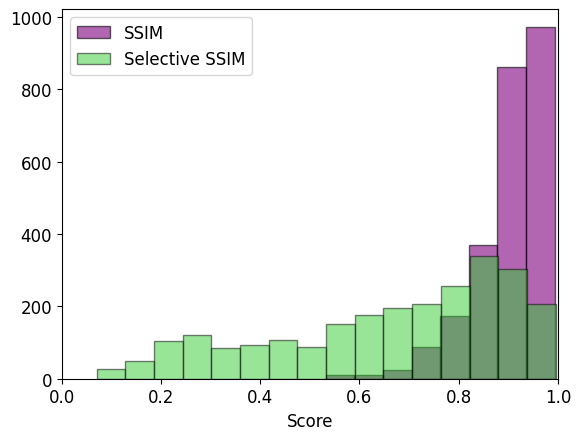

In [70]:
# n fold 0
plt.figure()
plt.hist(fold_0_test_ssim, bins=8, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_0_test_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results_10_0015/ssim_distribution_test_0.png")

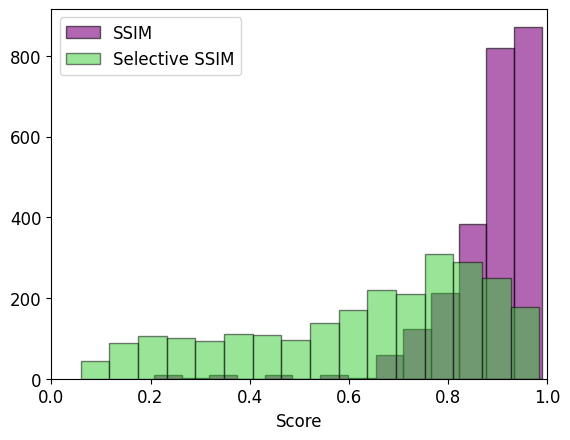

In [68]:
# n fold 1
plt.figure()
plt.hist(fold_1_test_ssim, bins=14, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_1_test_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results_10_0015/ssim_distribution_test_1.png")

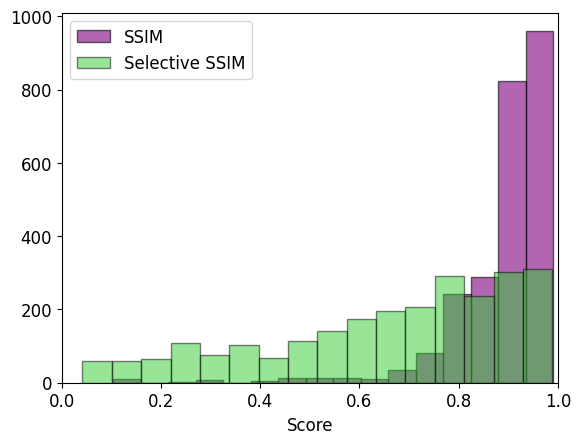

In [66]:
# n fold 2
plt.figure()
plt.hist(fold_2_test_ssim, bins=16, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_2_test_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results_10_0015/ssim_distribution_test_2.png")

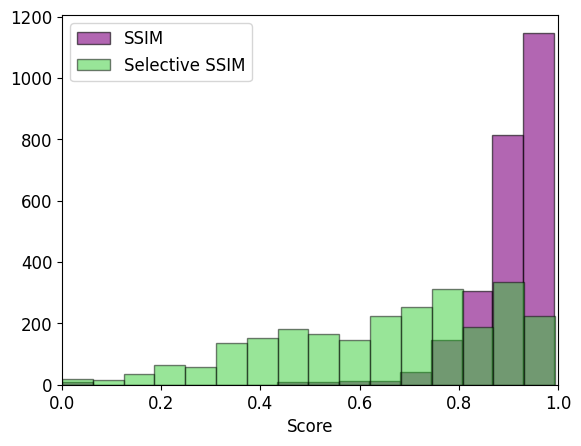

In [65]:
# n fold 3
plt.figure()
plt.hist(fold_3_test_ssim, bins=16, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_3_test_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results_10_0015/ssim_distribution_test_3.png")

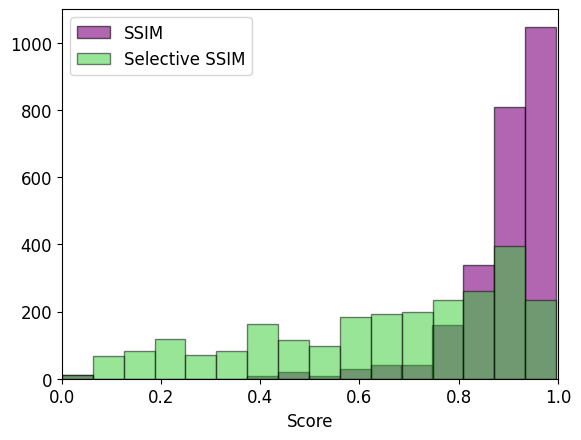

In [64]:
# n fold 4
plt.figure()
plt.hist(fold_4_test_ssim, bins=16, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_4_test_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results_10_0015/ssim_distribution_test_4.png")

### PSNR Comparison for each n-fold

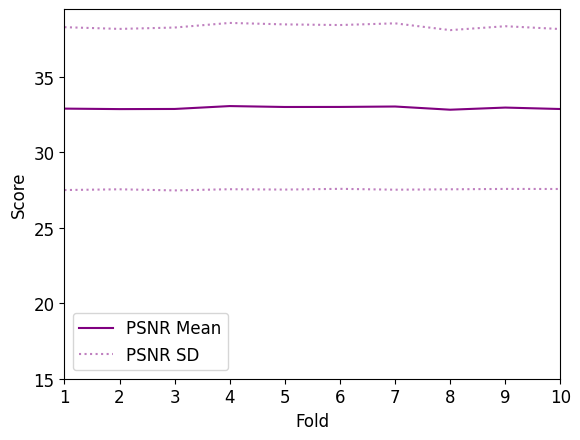

In [71]:
psnr_means = test_results_psnr_0.mean()
psnr_stds = test_results_psnr_0.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)
plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=39.5)
plt.savefig("unet_results_10_0015/psnr_test_0.png")

In [72]:
print(psnr_means, psnr_stds)

0    32.904987
1    32.872625
2    32.881491
3    33.073134
4    33.012761
5    33.016041
6    33.044273
7    32.832264
8    32.974002
9    32.878508
dtype: float64 0    5.397915
1    5.316031
2    5.398049
3    5.511820
4    5.474450
5    5.428926
6    5.513907
7    5.275630
8    5.392869
9    5.301174
dtype: float64


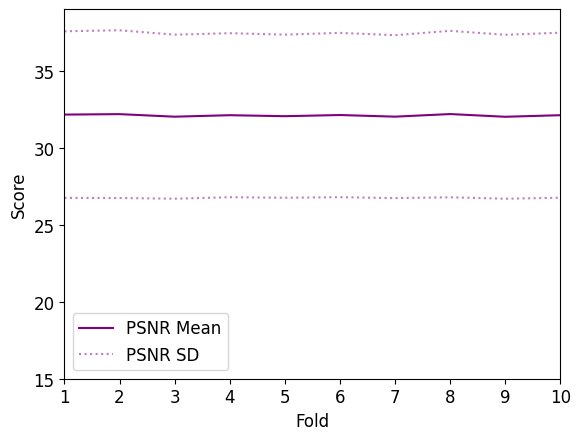

In [73]:
psnr_means = test_results_psnr_1.mean()
psnr_stds = test_results_psnr_1.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=39)
plt.savefig("unet_results_10_0015/psnr_test_1.png")

In [74]:
print(psnr_means, psnr_stds)

0    32.151580
1    32.180844
2    32.015431
3    32.111588
4    32.047640
5    32.122987
6    32.017629
7    32.185811
8    32.009961
9    32.111913
dtype: float64 0    5.409339
1    5.446444
2    5.325278
3    5.324287
4    5.296248
5    5.333743
6    5.289458
7    5.404576
8    5.322016
9    5.358183
dtype: float64


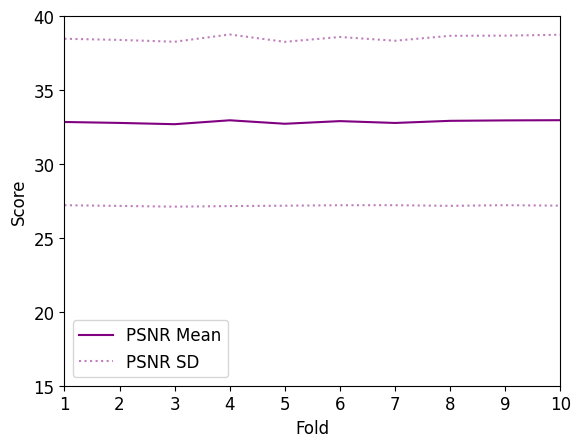

In [75]:
psnr_means = test_results_psnr_2.mean()
psnr_stds = test_results_psnr_2.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=40)
plt.savefig("unet_results_10_0015/psnr_test_2.png")

In [76]:
print(psnr_means, psnr_stds)

0    32.839732
1    32.776133
2    32.689559
3    32.953993
4    32.719205
5    32.898398
6    32.773556
7    32.917793
8    32.946563
9    32.960243
dtype: float64 0    5.629626
1    5.614137
2    5.577204
3    5.803460
4    5.542392
5    5.690175
6    5.562044
7    5.751788
8    5.733746
9    5.780360
dtype: float64


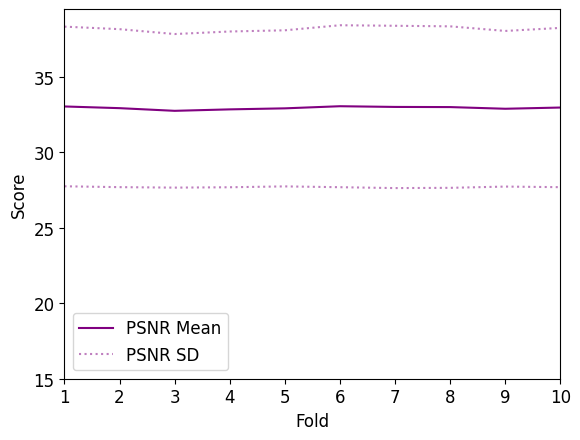

In [77]:
psnr_means = test_results_psnr_3.mean()
psnr_stds = test_results_psnr_3.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=39.5)
plt.savefig("unet_results_10_0015/psnr_test_3.png")

In [78]:
print(psnr_means, psnr_stds)

0    33.047635
1    32.935343
2    32.758120
3    32.854547
4    32.922629
5    33.063348
6    33.016592
7    33.006216
8    32.895439
9    32.976238
dtype: float64 0    5.291423
1    5.235927
2    5.090141
3    5.162738
4    5.173314
5    5.367938
6    5.379480
7    5.352504
8    5.158442
9    5.278842
dtype: float64


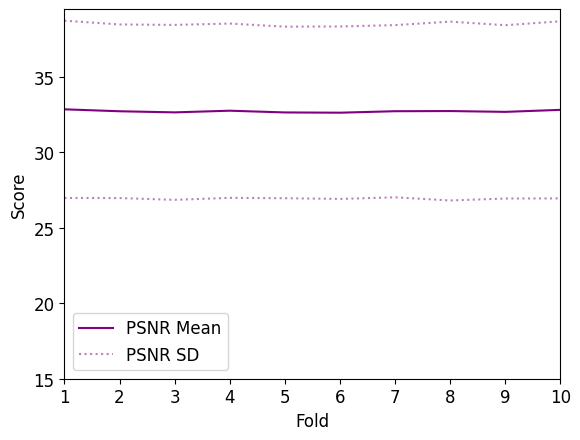

In [79]:
psnr_means = test_results_psnr_4.mean()
psnr_stds = test_results_psnr_4.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=39.5)
plt.savefig("unet_results_10_0015/psnr_test_4.png")

In [80]:
print(psnr_means, psnr_stds)

0    32.858222
1    32.729671
2    32.655564
3    32.766340
4    32.651200
5    32.634144
6    32.732688
7    32.743285
8    32.689261
9    32.823053
dtype: float64 0    5.876217
1    5.753559
2    5.797580
3    5.777213
4    5.685719
5    5.715813
6    5.706438
7    5.927567
8    5.744360
9    5.869729
dtype: float64


### PSNR vals for all n-folds combined

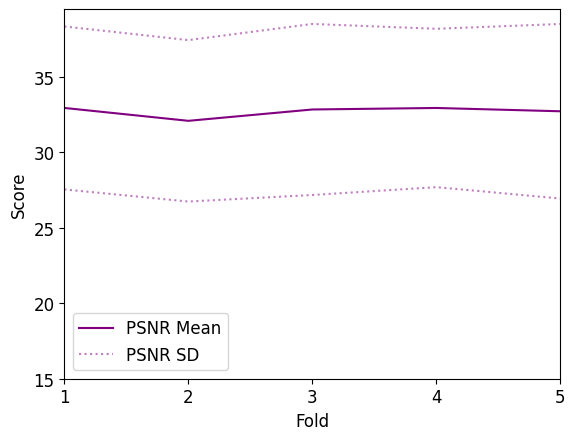

In [81]:
psnr_means_0 = test_results_psnr_0.mean()
psnr_stds_0 = test_results_psnr_0.std()
psnr_std_upper_0 = psnr_means_0 + psnr_stds_0
psnr_std_lower_0 = psnr_means_0 - psnr_stds_0
psnr_means_0 = psnr_means_0.mean()
psnr_stds_0 = psnr_stds_0.mean()
psnr_std_upper_0 = psnr_std_upper_0.mean()
psnr_std_lower_0 = psnr_std_lower_0.mean()

psnr_means_1 = test_results_psnr_1.mean()
psnr_stds_1 = test_results_psnr_1.std()
psnr_std_upper_1 = psnr_means_1 + psnr_stds_1
psnr_std_lower_1 = psnr_means_1 - psnr_stds_1
psnr_means_1 = psnr_means_1.mean()
psnr_stds_1 = psnr_stds_1.mean()
psnr_std_upper_1 = psnr_std_upper_1.mean()
psnr_std_lower_1 = psnr_std_lower_1.mean()

psnr_means_2 = test_results_psnr_2.mean()
psnr_stds_2 = test_results_psnr_2.std()
psnr_std_upper_2 = psnr_means_2 + psnr_stds_2
psnr_std_lower_2 = psnr_means_2 - psnr_stds_2
psnr_means_2 = psnr_means_2.mean()
psnr_stds_2 = psnr_stds_2.mean()
psnr_std_upper_2 = psnr_std_upper_2.mean()
psnr_std_lower_2 = psnr_std_lower_2.mean()

psnr_means_3 = test_results_psnr_3.mean()
psnr_stds_3 = test_results_psnr_3.std()
psnr_std_upper_3 = psnr_means_3 + psnr_stds_3
psnr_std_lower_3 = psnr_means_3 - psnr_stds_3
psnr_means_3 = psnr_means_3.mean()
psnr_stds_3 = psnr_stds_3.mean()
psnr_std_upper_3 = psnr_std_upper_3.mean()
psnr_std_lower_3 = psnr_std_lower_3.mean()

psnr_means_4 = test_results_psnr_4.mean()
psnr_stds_4 = test_results_psnr_4.std()
psnr_std_upper_4 = psnr_means_4 + psnr_stds_4
psnr_std_lower_4 = psnr_means_4 - psnr_stds_4
psnr_means_4 = psnr_means_4.mean()
psnr_stds_4 = psnr_stds_4.mean()
psnr_std_upper_4 = psnr_std_upper_4.mean()
psnr_std_lower_4 = psnr_std_lower_4.mean()

psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_stds_0, psnr_stds_1, psnr_stds_2, psnr_stds_3, psnr_stds_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]


n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=15, ymax=39.5)
plt.savefig("unet_results_10_0015/psnr_test_mean_all_folds.png")

In [82]:
print(psnr_means, psnr_stds)

[32.94900867146289, 32.09553846959266, 32.847517382664215, 32.94761073510438, 32.72834268881998] [5.401077082533164, 5.3509572379394665, 5.668493227004502, 5.249074929967039, 5.78541942846024]


### PSNR means and stds over all n-folds

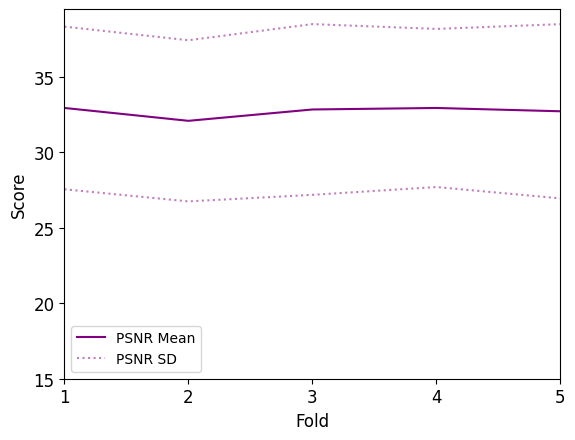

In [14]:
fold_0_test_psnr = np.array(test_results_psnr_0).reshape(-1,1)
fold_1_test_psnr = np.array(test_results_psnr_1).reshape(-1,1)
fold_2_test_psnr = np.array(test_results_psnr_2).reshape(-1,1)
fold_3_test_psnr = np.array(test_results_psnr_3).reshape(-1,1)
fold_4_test_psnr = np.array(test_results_psnr_4).reshape(-1,1)

psnr_means_0 = np.mean(fold_0_test_psnr)
psnr_std_0 = np.std(fold_0_test_psnr)
psnr_std_upper_0 = psnr_means_0 + psnr_std_0
psnr_std_lower_0 = psnr_means_0 - psnr_std_0

psnr_means_1 = np.mean(fold_1_test_psnr)
psnr_std_1 = np.std(fold_1_test_psnr)
psnr_std_upper_1 = psnr_means_1 + psnr_std_1
psnr_std_lower_1 = psnr_means_1 - psnr_std_1

psnr_means_2 = np.mean(fold_2_test_psnr)
psnr_std_2 = np.std(fold_2_test_psnr)
psnr_std_upper_2 = psnr_means_2 + psnr_std_2
psnr_std_lower_2 = psnr_means_2 - psnr_std_2

psnr_means_3 = np.mean(fold_3_test_psnr)
psnr_std_3 = np.std(fold_3_test_psnr)
psnr_std_upper_3 = psnr_means_3 + psnr_std_3
psnr_std_lower_3 = psnr_means_3 - psnr_std_3

psnr_means_4 = np.mean(fold_4_test_psnr)
psnr_std_4 = np.std(fold_4_test_psnr)
psnr_std_upper_4 = psnr_means_4 + psnr_std_4
psnr_std_lower_4 = psnr_means_4 - psnr_std_4
    
psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_std_0, psnr_std_1, psnr_std_2, psnr_std_3, psnr_std_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=15, ymax=39.5)
plt.savefig("unet_results_10_0015/psnr_test_mean_std_all_folds.png")

In [15]:
print(psnr_means, psnr_stds)

[32.94900867146289, 32.09553846959266, 32.847517382664215, 32.947610735104384, 32.728342688819986] [5.391499330621669, 5.340910714095796, 5.658741258110598, 5.240244461146842, 5.774822127158275]


### Distribution of PSNR Values

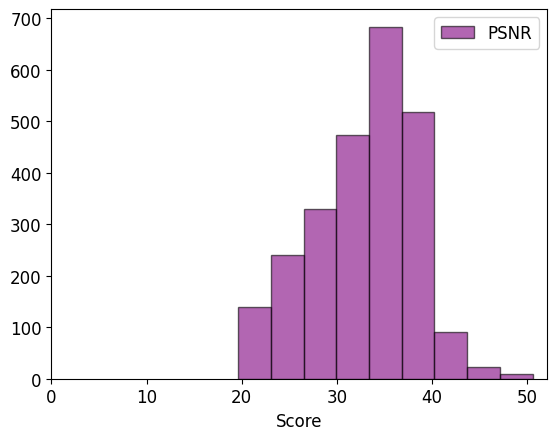

In [97]:
# n fold 0
plt.figure()
plt.hist(fold_0_test_psnr, bins=9, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results_10_0015/psnr_distribution_test_0.png")

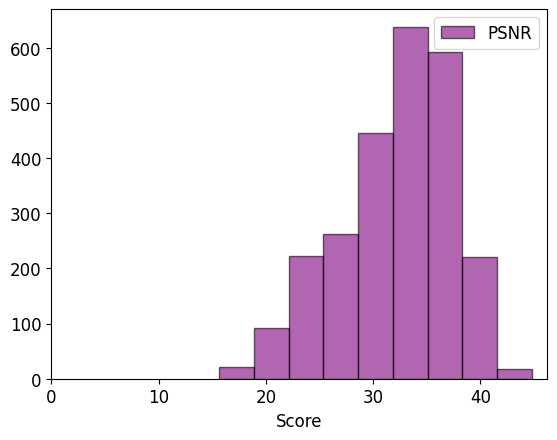

In [96]:
# n fold 1
plt.figure()
plt.hist(fold_1_test_psnr, bins=9, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results_10_0015/psnr_distribution_test_1.png")

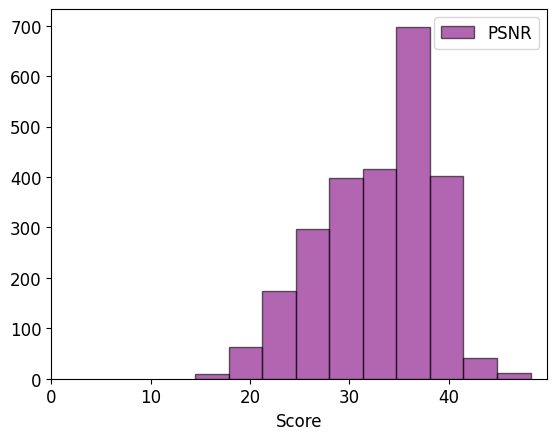

In [94]:
# n fold 2
plt.figure()
plt.hist(fold_2_test_psnr, bins=10, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results_10_0015/psnr_distribution_test_2.png")

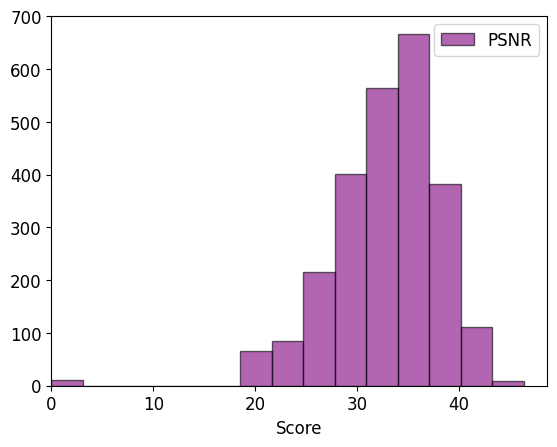

In [93]:
# n fold 3
plt.figure()
plt.hist(fold_3_test_psnr, bins=15, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results_10_0015/psnr_distribution_test_3.png")

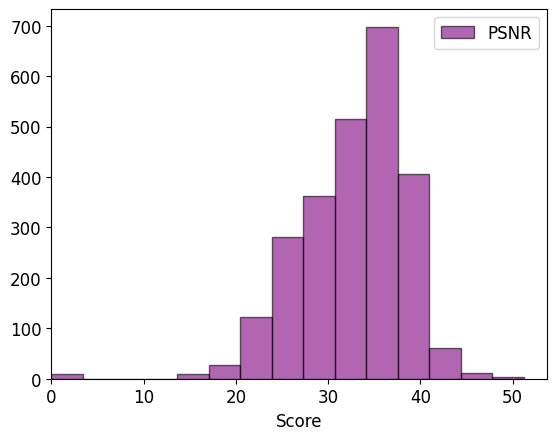

In [91]:
# n fold 4
plt.figure()
plt.hist(fold_4_test_psnr, bins=15, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results_10_0015/psnr_distribution_test_4.png")

## Visualize Train Set

### Results for each n-fold

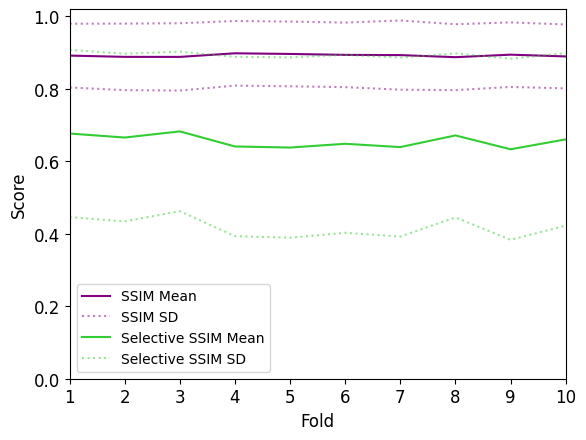

In [98]:
ssim_means = train_results_ssim_0.mean()
ssim_stds = train_results_ssim_0.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1

sssim_means = train_results_sssim_0.mean()
sssim_stds = train_results_sssim_0.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10_0015/ssim_train_0.png")

In [99]:
print(ssim_means, ssim_stds)

0    0.891740
1    0.888253
2    0.888163
3    0.898085
4    0.896319
5    0.893739
6    0.893116
7    0.887367
8    0.894317
9    0.889440
dtype: float64 0    0.087934
1    0.091813
2    0.092877
3    0.089229
4    0.089292
5    0.089076
6    0.095512
7    0.090921
8    0.089082
9    0.088203
dtype: float64


In [100]:
print(sssim_means, sssim_stds)

0    0.676709
1    0.665612
2    0.682547
3    0.640933
4    0.638020
5    0.648320
6    0.639245
7    0.671427
8    0.633280
9    0.660418
dtype: float64 0    0.230799
1    0.231415
2    0.220109
3    0.247449
4    0.248749
5    0.245678
6    0.246986
7    0.226258
8    0.249943
9    0.237950
dtype: float64


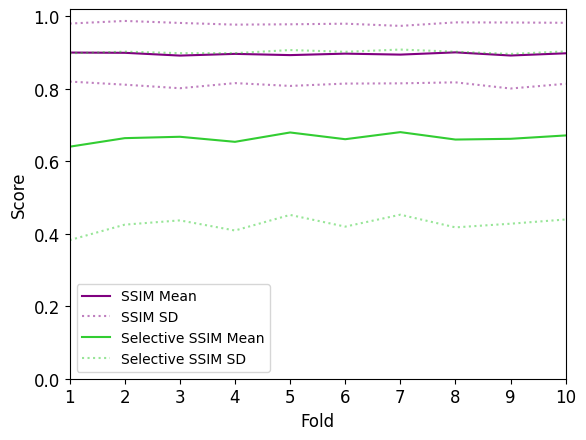

In [101]:
ssim_means = train_results_ssim_1.mean()
ssim_stds = train_results_ssim_1.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1

sssim_means = train_results_sssim_1.mean()
sssim_stds = train_results_sssim_1.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10_0015/ssim_train_1.png")

In [102]:
print(ssim_means, ssim_stds)

0    0.900109
1    0.899443
2    0.891782
3    0.896493
4    0.893090
5    0.897142
6    0.894450
7    0.900669
8    0.891972
9    0.898096
dtype: float64 0    0.080082
1    0.087950
2    0.090102
3    0.080682
4    0.085044
5    0.082666
6    0.079271
7    0.082735
8    0.091073
9    0.084185
dtype: float64


In [103]:
print(sssim_means, sssim_stds)

0    0.640330
1    0.663939
2    0.667731
3    0.653784
4    0.679576
5    0.660988
6    0.680529
7    0.660067
8    0.662093
9    0.671396
dtype: float64 0    0.257796
1    0.238736
2    0.230752
3    0.244743
4    0.227488
5    0.241242
6    0.227883
7    0.242392
8    0.234306
9    0.231956
dtype: float64


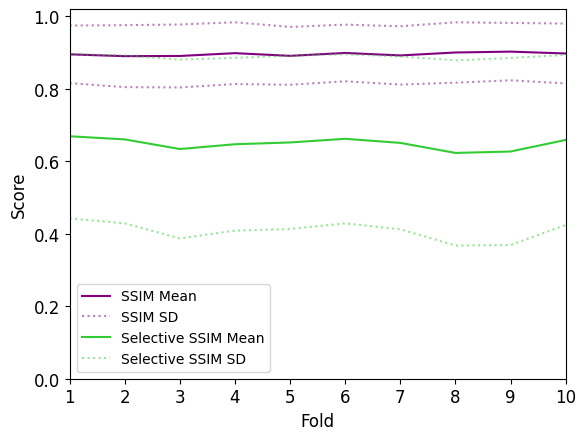

In [104]:
ssim_means = train_results_ssim_2.mean()
ssim_stds = train_results_ssim_2.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = train_results_sssim_2.mean()
sssim_stds = train_results_sssim_2.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10_0015/ssim_train_2.png")

In [105]:
print(sssim_means, sssim_stds)

0    0.669142
1    0.660479
2    0.633924
3    0.647114
4    0.652038
5    0.662112
6    0.650809
7    0.623136
8    0.627036
9    0.658967
dtype: float64 0    0.226586
1    0.231676
2    0.246755
3    0.238421
4    0.238885
5    0.233377
6    0.238453
7    0.255494
8    0.258141
9    0.234792
dtype: float64


In [106]:
print(ssim_means, ssim_stds)

0    0.895225
1    0.890169
2    0.890739
3    0.898464
4    0.891040
5    0.899022
6    0.892181
7    0.900313
8    0.902698
9    0.897590
dtype: float64 0    0.079512
1    0.085438
2    0.086911
3    0.085221
4    0.079849
5    0.078124
6    0.080478
7    0.083310
8    0.079267
9    0.082553
dtype: float64


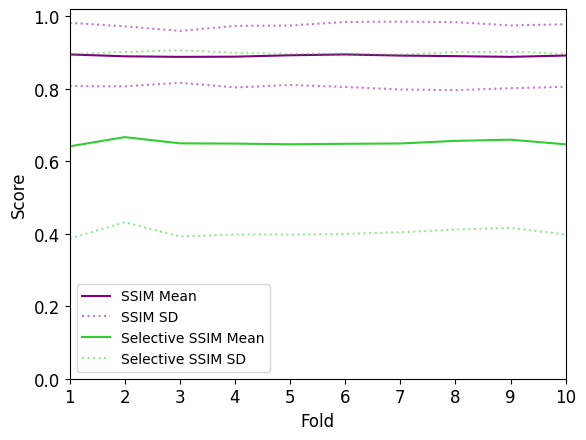

In [108]:
ssim_means = train_results_ssim_3.mean()
ssim_stds = train_results_ssim_3.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = train_results_sssim_3.mean()
sssim_stds = train_results_sssim_3.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10_0015/ssim_train_3.png")

In [109]:
print(ssim_means, ssim_stds)

0    0.894905
1    0.889798
2    0.888237
3    0.888803
4    0.892628
5    0.894927
6    0.891776
7    0.890270
8    0.888267
9    0.891935
dtype: float64 0    0.087339
1    0.082776
2    0.071659
3    0.084838
4    0.082034
5    0.089687
6    0.093622
7    0.093875
8    0.086666
9    0.086226
dtype: float64


In [110]:
print(sssim_means, sssim_stds)

0    0.641364
1    0.666775
2    0.649620
3    0.648913
4    0.647005
5    0.648320
6    0.649256
7    0.656439
8    0.659676
9    0.646857
dtype: float64 0    0.254751
1    0.234958
2    0.256986
3    0.250723
4    0.249153
5    0.248858
6    0.245046
7    0.244889
8    0.243276
9    0.249015
dtype: float64


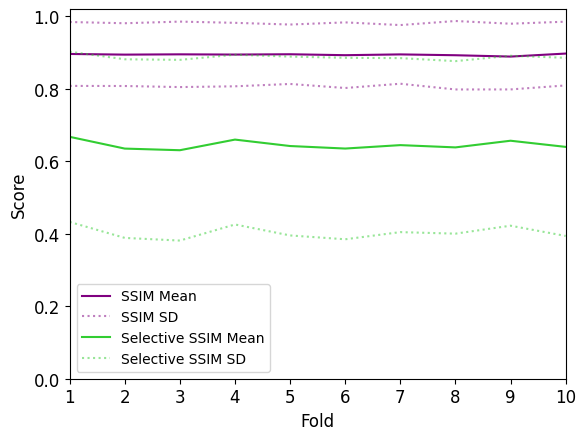

In [111]:
ssim_means = train_results_ssim_4.mean()
ssim_stds = train_results_ssim_4.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = train_results_sssim_4.mean()
sssim_stds = train_results_sssim_4.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10_0015/ssim_train_4.png")

In [112]:
print(sssim_means, sssim_stds)

0    0.667567
1    0.635104
2    0.630611
3    0.659934
4    0.642176
5    0.635229
6    0.644674
7    0.638417
8    0.656792
9    0.639813
dtype: float64 0    0.234887
1    0.246476
2    0.249369
3    0.234257
4    0.246768
5    0.250404
6    0.240086
7    0.238066
8    0.234503
9    0.245811
dtype: float64


In [113]:
print(ssim_means, ssim_stds)

0    0.896255
1    0.894425
2    0.895226
3    0.894582
4    0.895455
5    0.892860
6    0.895037
7    0.892746
8    0.889046
9    0.897368
dtype: float64 0    0.088160
1    0.086601
2    0.090350
3    0.087582
4    0.081996
5    0.090535
6    0.080947
7    0.094451
8    0.090678
9    0.087975
dtype: float64


### Results for all n-folds combined

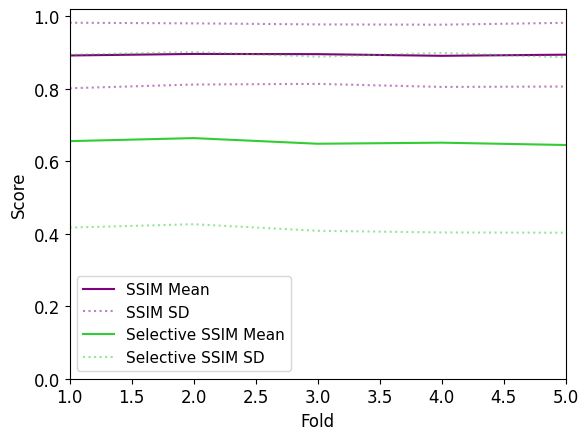

In [114]:
ssim_means_0 = train_results_ssim_0.mean()
ssim_stds_0 = train_results_ssim_0.std()
ssim_std_upper_0 = ssim_means_0 + ssim_stds_0
ssim_std_lower_0 = ssim_means_0 - ssim_stds_0
ssim_means_0 = ssim_means_0.mean()
ssim_stds_0 = ssim_stds_0.mean()
ssim_std_upper_0 = ssim_std_upper_0.mean()
ssim_std_lower_0 = ssim_std_lower_0.mean()

ssim_means_1 = train_results_ssim_1.mean()
ssim_stds_1 = train_results_ssim_1.std()
ssim_std_upper_1 = ssim_means_1 + ssim_stds_1
ssim_std_lower_1 = ssim_means_1 - ssim_stds_1
ssim_means_1 = ssim_means_1.mean()
ssim_stds_1 = ssim_stds_1.mean()
ssim_std_upper_1 = ssim_std_upper_1.mean()
ssim_std_lower_1 = ssim_std_lower_1.mean()

ssim_means_2 = train_results_ssim_2.mean()
ssim_stds_2 = train_results_ssim_2.std()
ssim_std_upper_2 = ssim_means_2 + ssim_stds_2
ssim_std_lower_2 = ssim_means_2 - ssim_stds_2
ssim_means_2 = ssim_means_2.mean()
ssim_stds_2 = ssim_stds_2.mean()
ssim_std_upper_2 = ssim_std_upper_2.mean()
ssim_std_lower_2 = ssim_std_lower_2.mean()

ssim_means_3 = train_results_ssim_3.mean()
ssim_stds_3 = train_results_ssim_3.std()
ssim_std_upper_3 = ssim_means_3 + ssim_stds_3
ssim_std_lower_3 = ssim_means_3 - ssim_stds_3
ssim_means_3 = ssim_means_3.mean()
ssim_stds_3 = ssim_stds_3.mean()
ssim_std_upper_3 = ssim_std_upper_3.mean()
ssim_std_lower_3 = ssim_std_lower_3.mean()

ssim_means_4 = train_results_ssim_4.mean()
ssim_stds_4 = train_results_ssim_4.std()
ssim_std_upper_4 = ssim_means_4 + ssim_stds_4
ssim_std_lower_4 = ssim_means_4 - ssim_stds_4
ssim_means_4 = ssim_means_4.mean()
ssim_stds_4 = ssim_stds_4.mean()
ssim_std_upper_4 = ssim_std_upper_4.mean()
ssim_std_lower_4 = ssim_std_lower_4.mean()

ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_stds_0, ssim_stds_1, ssim_stds_2, ssim_stds_3, ssim_stds_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

for i in range(len(ssim_std_upper)):
    if ssim_std_upper[i] > 1:
        ssim_std_upper[i] = 1

sssim_means_0 = train_results_sssim_0.mean()
sssim_stds_0 = train_results_sssim_0.std()
sssim_std_upper_0 = sssim_means_0 + sssim_stds_0
sssim_std_lower_0 = sssim_means_0 - sssim_stds_0
sssim_means_0 = sssim_means_0.mean()
sssim_stds_0 = sssim_stds_0.mean()
sssim_std_upper_0 = sssim_std_upper_0.mean()
sssim_std_lower_0 = sssim_std_lower_0.mean()

sssim_means_1 = train_results_sssim_1.mean()
sssim_stds_1 = train_results_sssim_1.std()
sssim_std_upper_1 = sssim_means_1 + sssim_stds_1
sssim_std_lower_1 = sssim_means_1 - sssim_stds_1
sssim_means_1 = sssim_means_1.mean()
sssim_stds_1 = sssim_stds_1.mean()
sssim_std_upper_1 = sssim_std_upper_1.mean()
sssim_std_lower_1 = sssim_std_lower_1.mean()

sssim_means_2 = train_results_sssim_2.mean()
sssim_stds_2 = train_results_sssim_2.std()
sssim_std_upper_2 = sssim_means_2 + sssim_stds_2
sssim_std_lower_2 = sssim_means_2 - sssim_stds_2
sssim_means_2 = sssim_means_2.mean()
sssim_stds_2 = sssim_stds_2.mean()
sssim_std_upper_2 = sssim_std_upper_2.mean()
sssim_std_lower_2 = sssim_std_lower_2.mean()

sssim_means_3 = train_results_sssim_3.mean()
sssim_stds_3 = train_results_sssim_3.std()
sssim_std_upper_3 = sssim_means_3 + sssim_stds_3
sssim_std_lower_3 = sssim_means_3 - sssim_stds_3
sssim_means_3 = sssim_means_3.mean()
sssim_stds_3 = sssim_stds_3.mean()
sssim_std_upper_3 = sssim_std_upper_3.mean()
sssim_std_lower_3 = sssim_std_lower_3.mean()

sssim_means_4 = train_results_sssim_4.mean()
sssim_stds_4 = train_results_sssim_4.std()
sssim_std_upper_4 = sssim_means_4 + sssim_stds_4
sssim_std_lower_4 = sssim_means_4 - sssim_stds_4
sssim_means_4 = sssim_means_4.mean()
sssim_stds_4 = sssim_stds_4.mean()
sssim_std_upper_4 = sssim_std_upper_4.mean()
sssim_std_lower_4 = sssim_std_lower_4.mean()

sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_stds_0, sssim_stds_1, sssim_stds_2, sssim_stds_3, sssim_stds_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

for i in range(len(sssim_std_upper)):
    if sssim_std_upper[i] > 1:
        sssim_std_upper[i] = 1

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=11)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10_0015/ssim_train_mean_all_folds.png")

In [115]:
print(ssim_means, ssim_stds)

[0.8920538971595441, 0.896324616900493, 0.8957442477031237, 0.8911546318284284, 0.8942999612196832] [0.0903939749298628, 0.08437894351441728, 0.08206638337996833, 0.08587214626630638, 0.08792751237593564]


In [116]:
print(sssim_means, sssim_stds)

[0.6556510175484234, 0.6640433671050079, 0.6484757779188843, 0.6514225145125891, 0.6450316313203511] [0.23853365872108556, 0.23772951236070536, 0.24025791185301698, 0.24776567334412042, 0.24206264397920935]


### Mean and SD on all n-folds combined

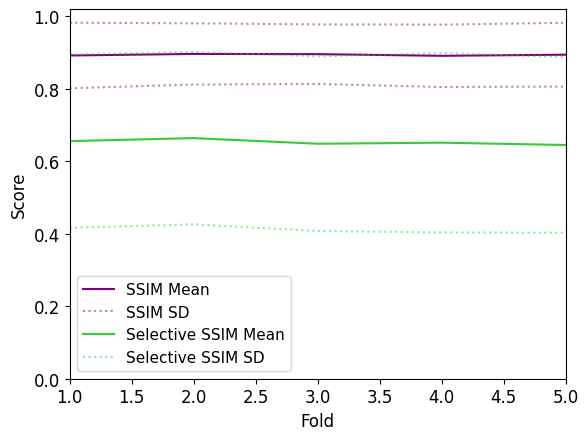

In [18]:
fold_0_train_ssim = np.array(train_results_ssim_0).reshape(-1,1)
fold_1_train_ssim = np.array(train_results_ssim_1).reshape(-1,1)
fold_2_train_ssim = np.array(train_results_ssim_2).reshape(-1,1)
fold_3_train_ssim = np.array(train_results_ssim_3).reshape(-1,1)
fold_4_train_ssim = np.array(train_results_ssim_4).reshape(-1,1)

ssim_means_0 = np.mean(fold_0_train_ssim)
ssim_std_0 = np.std(fold_0_train_ssim)
ssim_std_upper_0 = ssim_means_0 + ssim_std_0
ssim_std_lower_0 = ssim_means_0 - ssim_std_0
if ssim_std_upper_0 > 1:
    ssim_std_upper_0 = 1

ssim_means_1 = np.mean(fold_1_train_ssim)
ssim_std_1 = np.std(fold_1_train_ssim)
ssim_std_upper_1 = ssim_means_1 + ssim_std_1
ssim_std_lower_1 = ssim_means_1 - ssim_std_1
if ssim_std_upper_1 > 1:
    ssim_std_upper_1 = 1

ssim_means_2 = np.mean(fold_2_train_ssim)
ssim_std_2 = np.std(fold_2_train_ssim)
ssim_std_upper_2 = ssim_means_2 + ssim_std_2
ssim_std_lower_2 = ssim_means_2 - ssim_std_2
if ssim_std_upper_2 > 1:
    ssim_std_upper_2 = 1

ssim_means_3 = np.mean(fold_3_train_ssim)
ssim_std_3 = np.std(fold_3_train_ssim)
ssim_std_upper_3 = ssim_means_3 + ssim_std_3
ssim_std_lower_3 = ssim_means_3 - ssim_std_3
if ssim_std_upper_3 > 1:
    ssim_std_upper_3 = 1

ssim_means_4 = np.mean(fold_4_train_ssim)
ssim_std_4 = np.std(fold_4_train_ssim)
ssim_std_upper_4 = ssim_means_4 + ssim_std_4
ssim_std_lower_4 = ssim_means_4 - ssim_std_4
if ssim_std_upper_4 > 1:
    ssim_std_upper_4 = 1
    
ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_std_0, ssim_std_1, ssim_std_2, ssim_std_3, ssim_std_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

fold_0_train_sssim = np.array(train_results_sssim_0).reshape(-1,1)
fold_1_train_sssim = np.array(train_results_sssim_1).reshape(-1,1)
fold_2_train_sssim = np.array(train_results_sssim_2).reshape(-1,1)
fold_3_train_sssim = np.array(train_results_sssim_3).reshape(-1,1)
fold_4_train_sssim = np.array(train_results_sssim_4).reshape(-1,1)

sssim_means_0 = np.mean(fold_0_train_sssim)
sssim_std_0 = np.std(fold_0_train_sssim)
sssim_std_upper_0 = sssim_means_0 + sssim_std_0
sssim_std_lower_0 = sssim_means_0 - sssim_std_0
if sssim_std_upper_0 > 1:
    sssim_std_upper_0 = 1

sssim_means_1 = np.mean(fold_1_train_sssim)
sssim_std_1 = np.std(fold_1_train_sssim)
sssim_std_upper_1 = sssim_means_1 + sssim_std_1
sssim_std_lower_1 = sssim_means_1 - sssim_std_1
if sssim_std_upper_1 > 1:
    sssim_std_upper_1 = 1

sssim_means_2 = np.mean(fold_2_train_sssim)
sssim_std_2 = np.std(fold_2_train_sssim)
sssim_std_upper_2 = sssim_means_2 + sssim_std_2
sssim_std_lower_2 = sssim_means_2 - sssim_std_2
if sssim_std_upper_2 > 1:
    sssim_std_upper_2 = 1

sssim_means_3 = np.mean(fold_3_train_sssim)
sssim_std_3 = np.std(fold_3_train_sssim)
sssim_std_upper_3 = sssim_means_3 + sssim_std_3
sssim_std_lower_3 = sssim_means_3 - sssim_std_3
if sssim_std_upper_3 > 1:
    sssim_std_upper_3 = 1

sssim_means_4 = np.mean(fold_4_train_sssim)
sssim_std_4 = np.std(fold_4_train_sssim)
sssim_std_upper_4 = sssim_means_4 + sssim_std_4
sssim_std_lower_4 = sssim_means_4 - sssim_std_4
if sssim_std_upper_4 > 1:
    sssim_std_upper_4 = 1
    
    
sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_std_0, sssim_std_1, sssim_std_2, sssim_std_3, sssim_std_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)


plt.legend(fontsize=11)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10_0015/ssim_train_mean_std_all_folds.png")

In [21]:
print(ssim_means, ssim_stds)

[0.8920538971595441, 0.8963246169004933, 0.8957442477031236, 0.8911546318284282, 0.8942999612196834] [0.09043982969540343, 0.08448303622445072, 0.08218271621059528, 0.08607173806999961, 0.0879905150763737]


In [22]:
print(sssim_means, sssim_stds)

[0.6556510175484234, 0.664043367105008, 0.6484757779188843, 0.6514225145125891, 0.6450316313203511] [0.2392229820732382, 0.2380304240712635, 0.24077750961613914, 0.24779791072178145, 0.24228303215938776]


### Distribution of SSIM/SSSIM Values

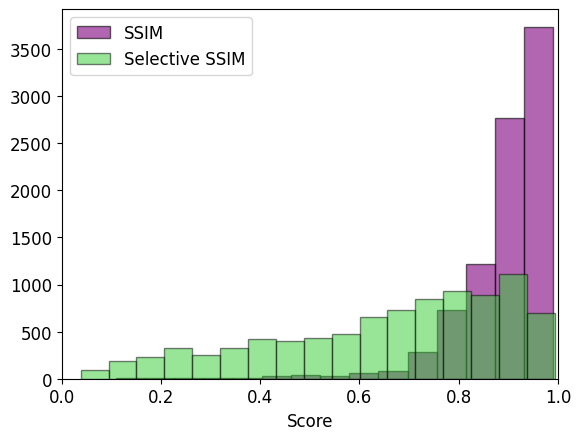

In [121]:
# n fold 0
plt.figure()
plt.hist(fold_0_train_ssim, bins=15, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_0_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results_10_0015/ssim_distribution_train_0.png")

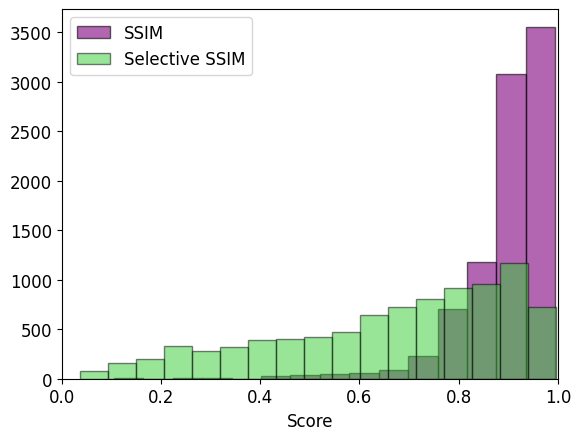

In [122]:
# n fold 1
plt.figure()
plt.hist(fold_1_train_ssim, bins=15, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_1_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results_10_0015/ssim_distribution_train_1.png")

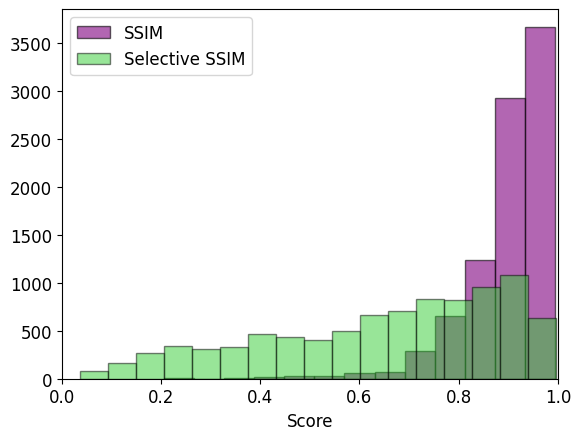

In [126]:
# n fold 2
plt.figure()
plt.hist(fold_2_train_ssim, bins=13, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_2_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results_10_0015/ssim_distribution_train_2.png")

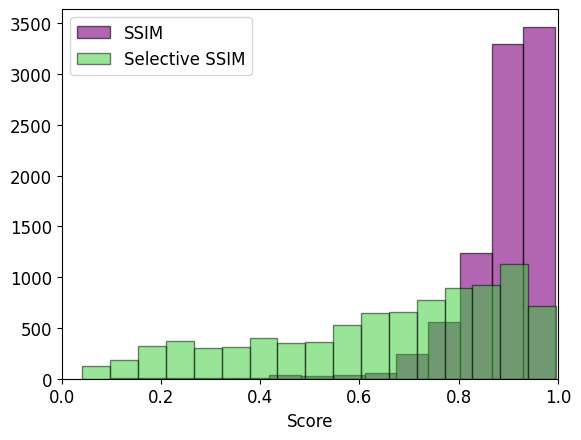

In [124]:
# n fold 3
plt.figure()
plt.hist(fold_3_train_ssim, bins=14, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_3_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results_10_0015/ssim_distribution_train_3.png")

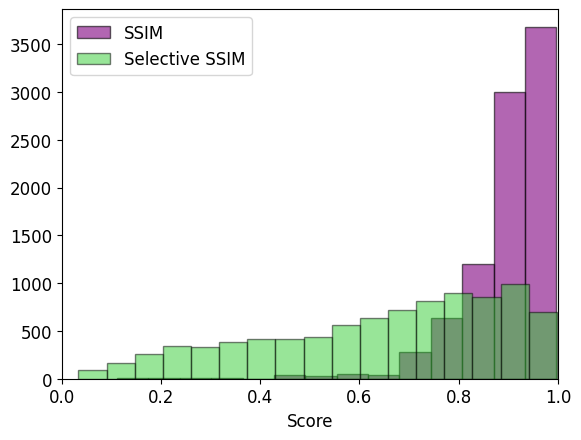

In [125]:
# n fold 4
plt.figure()
plt.hist(fold_4_train_ssim, bins=14, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_4_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results_10_0015/ssim_distribution_train_4.png")

### PSNR Results for each n-fold

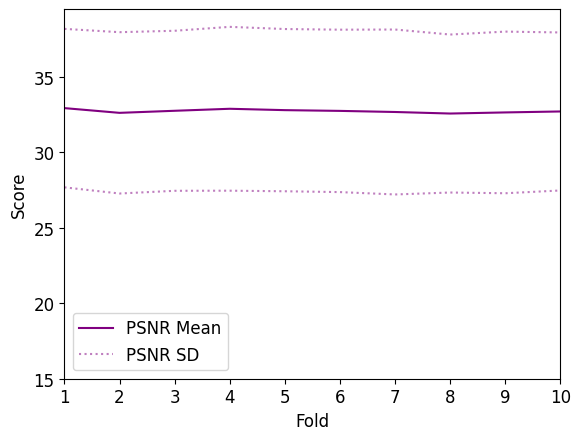

In [127]:
psnr_means = train_results_psnr_0.mean()
psnr_stds = train_results_psnr_0.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=39.5)
plt.savefig("unet_results_10_0015/psnr_train_0.png")

In [128]:
print(psnr_means, psnr_stds)

0    32.938335
1    32.624153
2    32.761090
3    32.894254
4    32.803527
5    32.754069
6    32.680798
7    32.578762
8    32.652224
9    32.715951
dtype: float64 0    5.251877
1    5.346905
2    5.304014
3    5.430175
4    5.376892
5    5.383198
6    5.466450
7    5.236003
8    5.357610
9    5.237382
dtype: float64


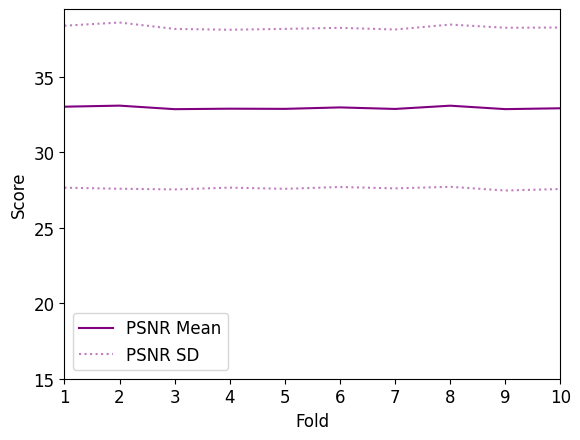

In [129]:
psnr_means = train_results_psnr_1.mean()
psnr_stds = train_results_psnr_1.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=39.5)
plt.savefig("unet_results_10_0015/psnr_train_1.png")

In [130]:
print(psnr_means, psnr_stds)

0    33.032232
1    33.102299
2    32.867997
3    32.900371
4    32.888647
5    32.984817
6    32.883158
7    33.098940
8    32.870776
9    32.927493
dtype: float64 0    5.368375
1    5.510030
2    5.319872
3    5.232353
4    5.301231
5    5.275187
6    5.264356
7    5.376357
8    5.394906
9    5.352231
dtype: float64


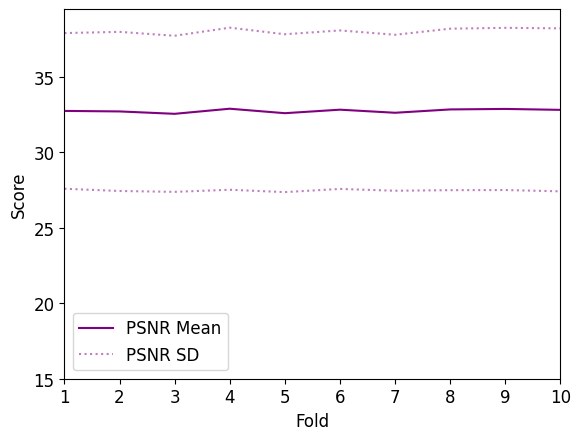

In [131]:
psnr_means = train_results_psnr_2.mean()
psnr_stds = train_results_psnr_2.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=39.5)
plt.savefig("unet_results_10_0015/psnr_train_2.png")

In [132]:
print(psnr_means, psnr_stds)

0    32.752341
1    32.718489
2    32.560144
3    32.897887
4    32.601732
5    32.834302
6    32.629890
7    32.850847
8    32.883973
9    32.822602
dtype: float64 0    5.159163
1    5.274001
2    5.173309
3    5.371921
4    5.232101
5    5.253451
6    5.169343
7    5.352145
8    5.375916
9    5.401629
dtype: float64


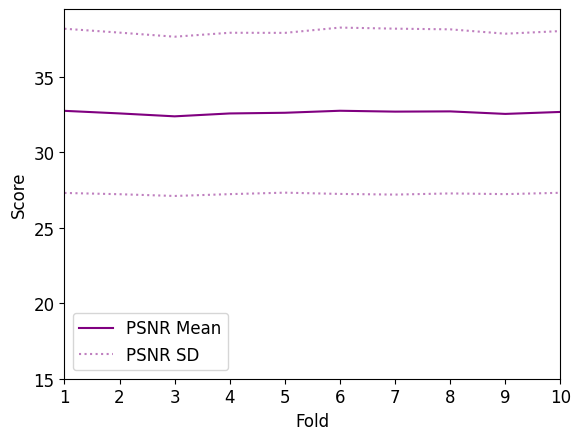

In [133]:
psnr_means = train_results_psnr_3.mean()
psnr_stds = train_results_psnr_3.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=39.5)
plt.savefig("unet_results_10_0015/psnr_train_3.png")

In [134]:
print(psnr_means, psnr_stds)

0    32.757362
1    32.586340
2    32.392927
3    32.584511
4    32.629647
5    32.762926
6    32.705209
7    32.721242
8    32.553961
9    32.684510
dtype: float64 0    5.442606
1    5.355978
2    5.278361
3    5.348775
4    5.295663
5    5.513491
6    5.499402
7    5.438449
8    5.317007
9    5.359446
dtype: float64


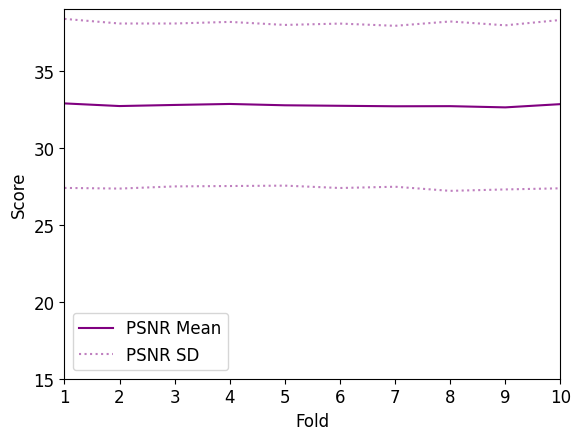

In [135]:
psnr_means = train_results_psnr_4.mean()
psnr_stds = train_results_psnr_4.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=39)
plt.savefig("unet_results_10_0015/psnr_train_4.png")

In [136]:
print(psnr_means, psnr_stds)

0    32.877898
1    32.706245
2    32.777444
3    32.841779
4    32.755765
5    32.722951
6    32.691501
7    32.698999
8    32.620000
9    32.829916
dtype: float64 0    5.487895
1    5.359430
2    5.288918
3    5.328810
4    5.217446
5    5.338232
6    5.224847
7    5.499543
8    5.328322
9    5.465199
dtype: float64


### PSNR Results for all n-folds combined

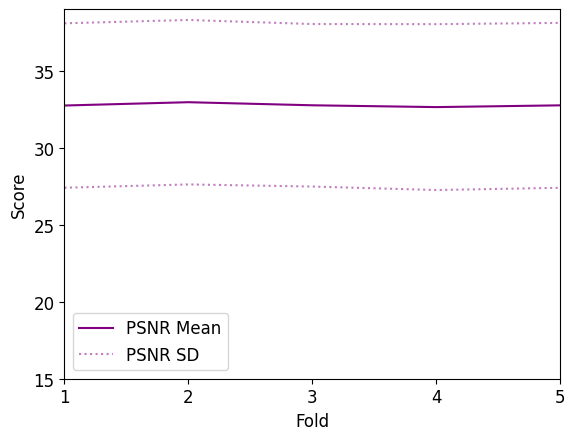

In [137]:
psnr_means_0 = train_results_psnr_0.mean()
psnr_stds_0 = train_results_psnr_0.std()
psnr_std_upper_0 = psnr_means_0 + psnr_stds_0
psnr_std_lower_0 = psnr_means_0 - psnr_stds_0
psnr_means_0 = psnr_means_0.mean()
psnr_stds_0 = psnr_stds_0.mean()
psnr_std_upper_0 = psnr_std_upper_0.mean()
psnr_std_lower_0 = psnr_std_lower_0.mean()

psnr_means_1 = train_results_psnr_1.mean()
psnr_stds_1 = train_results_psnr_1.std()
psnr_std_upper_1 = psnr_means_1 + psnr_stds_1
psnr_std_lower_1 = psnr_means_1 - psnr_stds_1
psnr_means_1 = psnr_means_1.mean()
psnr_stds_1 = psnr_stds_1.mean()
psnr_std_upper_1 = psnr_std_upper_1.mean()
psnr_std_lower_1 = psnr_std_lower_1.mean()

psnr_means_2 = train_results_psnr_2.mean()
psnr_stds_2 = train_results_psnr_2.std()
psnr_std_upper_2 = psnr_means_2 + psnr_stds_2
psnr_std_lower_2 = psnr_means_2 - psnr_stds_2
psnr_means_2 = psnr_means_2.mean()
psnr_stds_2 = psnr_stds_2.mean()
psnr_std_upper_2 = psnr_std_upper_2.mean()
psnr_std_lower_2 = psnr_std_lower_2.mean()

psnr_means_3 = train_results_psnr_3.mean()
psnr_stds_3 = train_results_psnr_3.std()
psnr_std_upper_3 = psnr_means_3 + psnr_stds_3
psnr_std_lower_3 = psnr_means_3 - psnr_stds_3
psnr_means_3 = psnr_means_3.mean()
psnr_stds_3 = psnr_stds_3.mean()
psnr_std_upper_3 = psnr_std_upper_3.mean()
psnr_std_lower_3 = psnr_std_lower_3.mean()

psnr_means_4 = train_results_psnr_4.mean()
psnr_stds_4 = train_results_psnr_4.std()
psnr_std_upper_4 = psnr_means_4 + psnr_stds_4
psnr_std_lower_4 = psnr_means_4 - psnr_stds_4
psnr_means_4 = psnr_means_4.mean()
psnr_stds_4 = psnr_stds_4.mean()
psnr_std_upper_4 = psnr_std_upper_4.mean()
psnr_std_lower_4 = psnr_std_lower_4.mean()

psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_stds_0, psnr_stds_1, psnr_stds_2, psnr_stds_3, psnr_stds_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]


n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=15, ymax=39)
plt.savefig("unet_results_10_0015/psnr_train_mean_all_folds.png")

In [138]:
print(psnr_means, psnr_stds)

[32.74031622603969, 32.95567297158622, 32.75522076107612, 32.63786340571324, 32.75224976068634] [5.339050518116805, 5.339489769485138, 5.276297969358543, 5.384917911546751, 5.353864094909544]


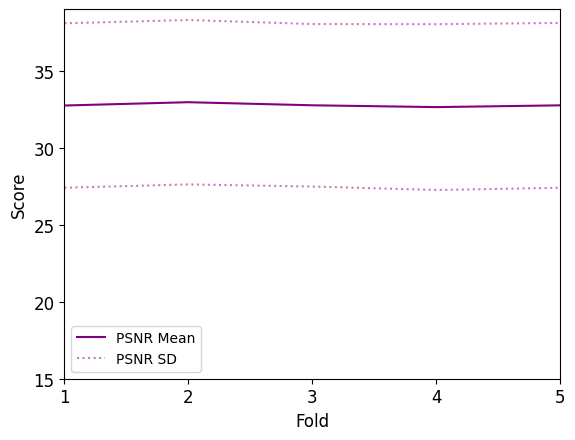

In [16]:
fold_0_train_psnr = np.array(train_results_psnr_0).reshape(-1,1)
fold_1_train_psnr = np.array(train_results_psnr_1).reshape(-1,1)
fold_2_train_psnr = np.array(train_results_psnr_2).reshape(-1,1)
fold_3_train_psnr = np.array(train_results_psnr_3).reshape(-1,1)
fold_4_train_psnr = np.array(train_results_psnr_4).reshape(-1,1)

psnr_means_0 = np.mean(fold_0_train_psnr)
psnr_std_0 = np.std(fold_0_train_psnr)
psnr_std_upper_0 = psnr_means_0 + psnr_std_0
psnr_std_lower_0 = psnr_means_0 - psnr_std_0

psnr_means_1 = np.mean(fold_1_train_psnr)
psnr_std_1 = np.std(fold_1_train_psnr)
psnr_std_upper_1 = psnr_means_1 + psnr_std_1
psnr_std_lower_1 = psnr_means_1 - psnr_std_1

psnr_means_2 = np.mean(fold_2_train_psnr)
psnr_std_2 = np.std(fold_2_train_psnr)
psnr_std_upper_2 = psnr_means_2 + psnr_std_2
psnr_std_lower_2 = psnr_means_2 - psnr_std_2

psnr_means_3 = np.mean(fold_3_train_psnr)
psnr_std_3 = np.std(fold_3_train_psnr)
psnr_std_upper_3 = psnr_means_3 + psnr_std_3
psnr_std_lower_3 = psnr_means_3 - psnr_std_3

psnr_means_4 = np.mean(fold_4_train_psnr)
psnr_std_4 = np.std(fold_4_train_psnr)
psnr_std_upper_4 = psnr_means_4 + psnr_std_4
psnr_std_lower_4 = psnr_means_4 - psnr_std_4
    
psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_std_0, psnr_std_1, psnr_std_2, psnr_std_3, psnr_std_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=15, ymax=39)
plt.savefig("unet_results_10_0015/psnr_train_mean_std_all_folds.png")


In [17]:
print(psnr_means, psnr_stds)

[32.740316226039695, 32.955672971586225, 32.75522076107612, 32.63786340571325, 32.75224976068634] [5.337745605897911, 5.3377885769894196, 5.27540004678312, 5.383588463614899, 5.352293475171429]


### Distribution of PSNR Values

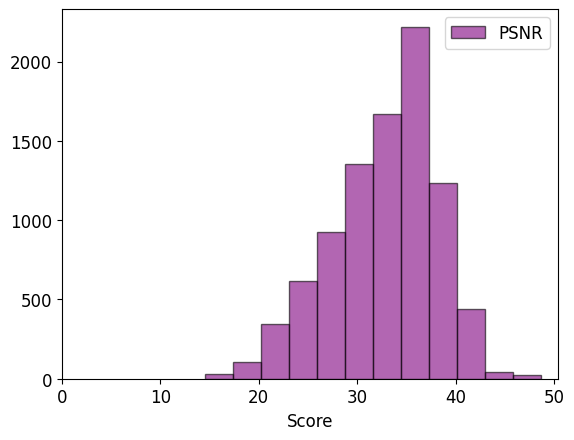

In [141]:
# n fold 0
plt.figure()
plt.hist(fold_0_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results_10_0015/psnr_distribution_train_0.png")

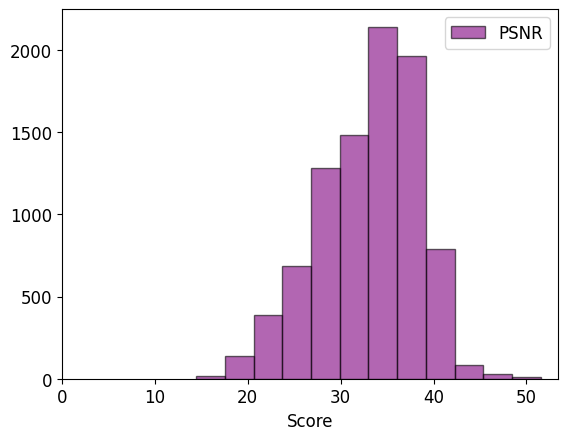

In [142]:
# n fold 1
plt.figure()
plt.hist(fold_1_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results_10_0015/psnr_distribution_train_1.png")

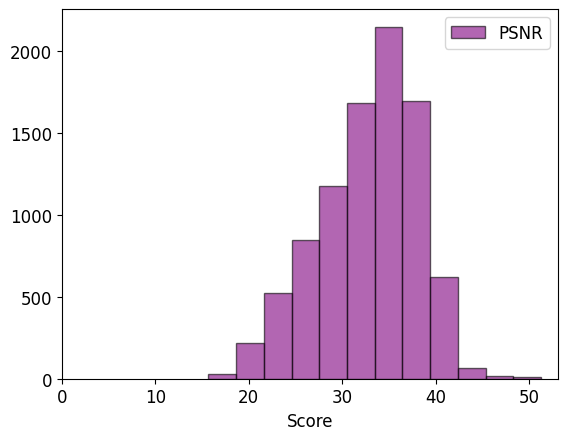

In [143]:
# n fold 2
plt.figure()
plt.hist(fold_2_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results_10_0015/psnr_distribution_train_2.png")

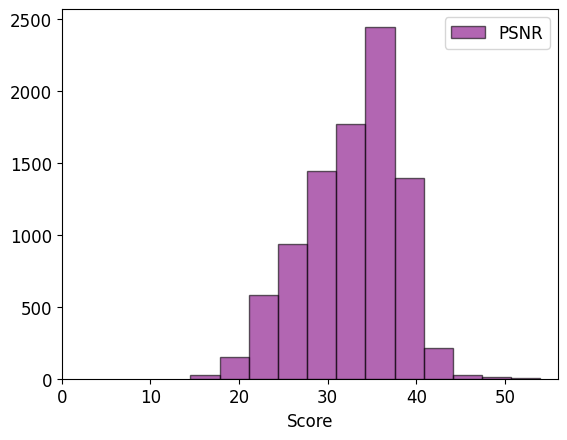

In [144]:
# n fold 3
plt.figure()
plt.hist(fold_4_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results_10_0015/psnr_distribution_train_3.png")

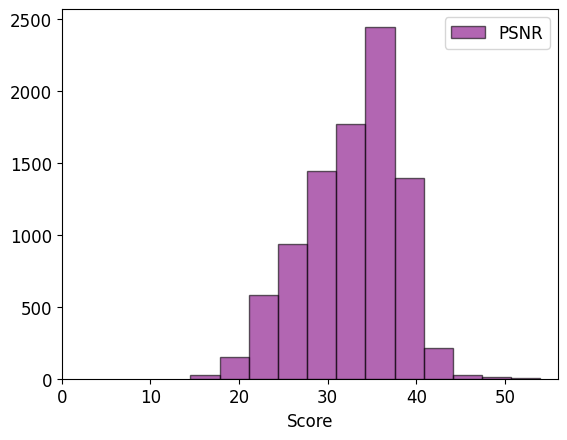

In [145]:
# n fold 4
plt.figure()
plt.hist(fold_4_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results_10_0015/psnr_distribution_train_4.png")